### Single Cell Sequencing: NEFH cells

Experiment for analysis of Gabriela's cells. 

In [128]:
!pip install --quiet anndata
import os
import config as general_paths
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import anndata as ad
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
#doublet detection
#batch correction (not installed by default in the docker container, install via command line: pip install scanorama bbknn)
#external modules
import scanpy.external as sce
#pretty plotting
import seaborn as sb
import sys 
sb.set_context(context='poster')
from matplotlib import rcParams
from datetime import date
today = date.today()

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.24.3 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.11.6 louvain==0.8.2 pynndescent==0.5.12


In [129]:
figure_path = general_paths.figures_path
data_path = general_paths.data_path
output_path = general_paths.output_path
input_path = output_path
local_path = general_paths.local_path

In [130]:
adata = ad.read_h5ad(os.path.join(input_path , 'campari_scs.h5ad'))
adata_all = ad.read_h5ad(os.path.join(input_path , 'campari_scs_all_genes.h5ad'))

NEFH_cells = np.logical_or(adata.obs['stimulus'] == 37,adata.obs['stimulus'] == 37 )
adata = adata[NEFH_cells,:]
print(adata.shape)
print(adata.shape)

/home/melma31/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


(187, 16000)
(187, 16000)


/home/melma31/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


computing PCA
    with n_comps=20
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing tSNE
    using 'X_pca' with n_pcs = 20
    using sklearn.manifold.TSNE


/home/melma31/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


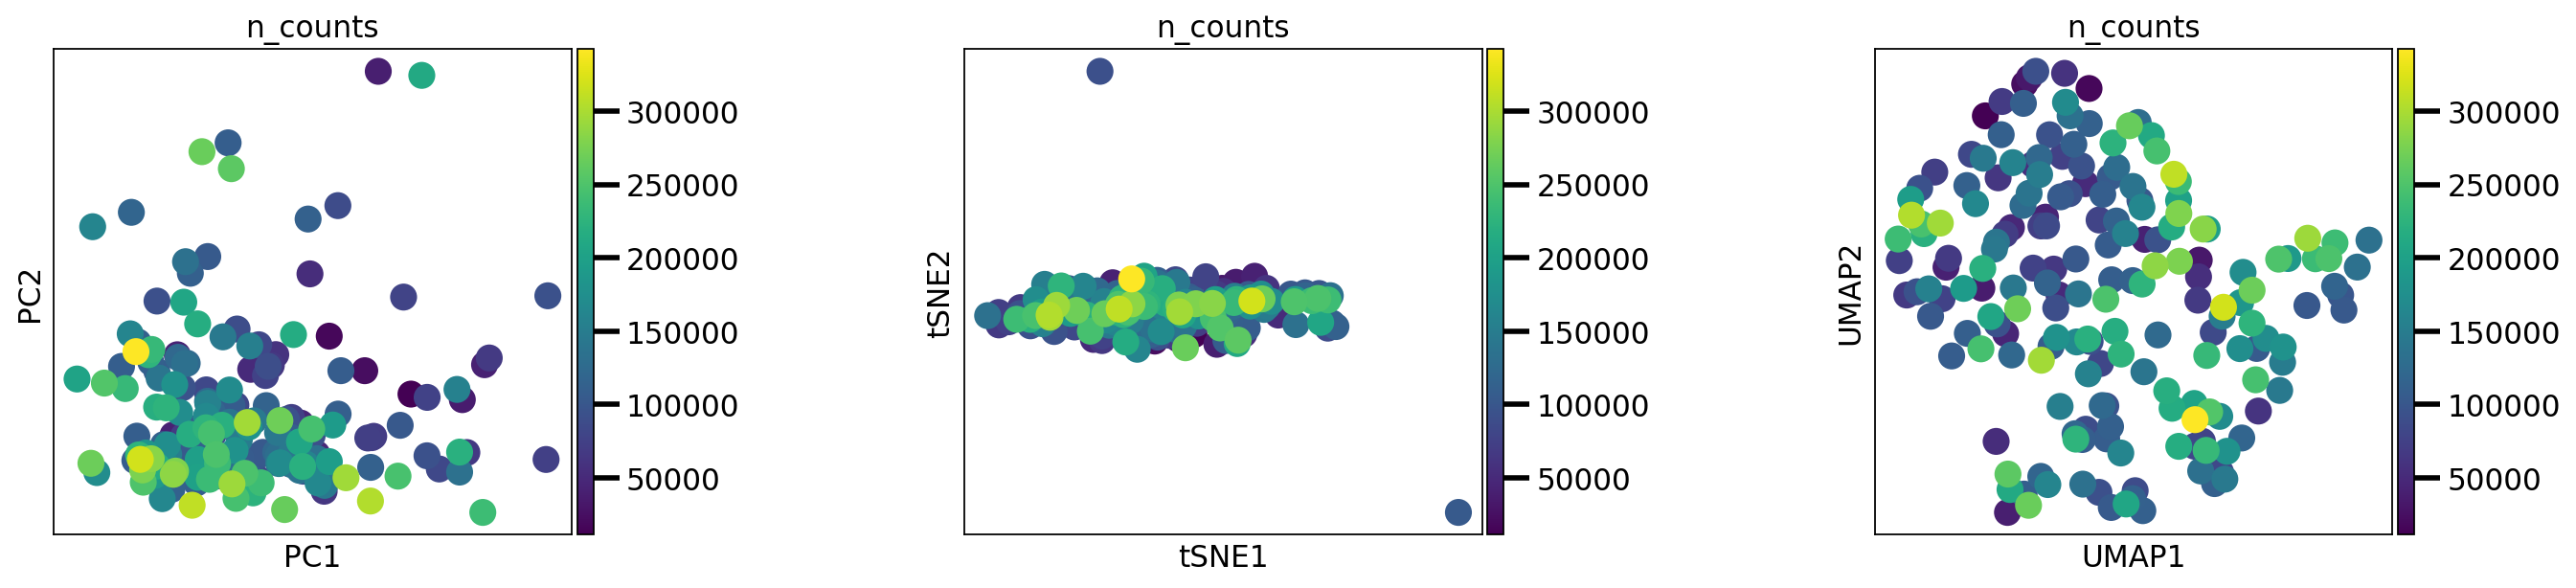

In [131]:
N_selected = 20
sc.pp.pca(adata, n_comps=N_selected, use_highly_variable=True, svd_solver='arpack')
#sc.pp.pca(adata, n_comps=N_selected, svd_solver='arpack')

#sc.pl.pca_variance_ratio(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)
sc.tl.umap(adata)

from matplotlib import rcParams

rcParams['figure.figsize']=(20,10)
fig_ind=np.arange(231, 237)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p10 = sc.pl.pca_scatter(adata, color='n_counts', ax=fig.add_subplot(fig_ind[0]), show=False)
p11 = sc.pl.tsne(adata, color='n_counts', ax=fig.add_subplot(fig_ind[1]), show=False)
p12 = sc.pl.umap(adata, color='n_counts', ax=fig.add_subplot(fig_ind[2]), show=False)
#p13 = sc.pl.diffmap(adata, color='n_counts', components=['1,2'], ax=fig.add_subplot(fig_ind[3]),show=False)
#p14 = sc.pl.diffmap(adata, color='n_counts', components=['1,3'], ax=fig.add_subplot(fig_ind[4]), show=False)
#p15 = sc.pl.draw_graph(adata, color='n_counts', ax=fig.add_subplot(fig_ind[5]), show=False)

plt.show()

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain_r1', the cluster labels (adata.obs, categorical) (0:00:00)


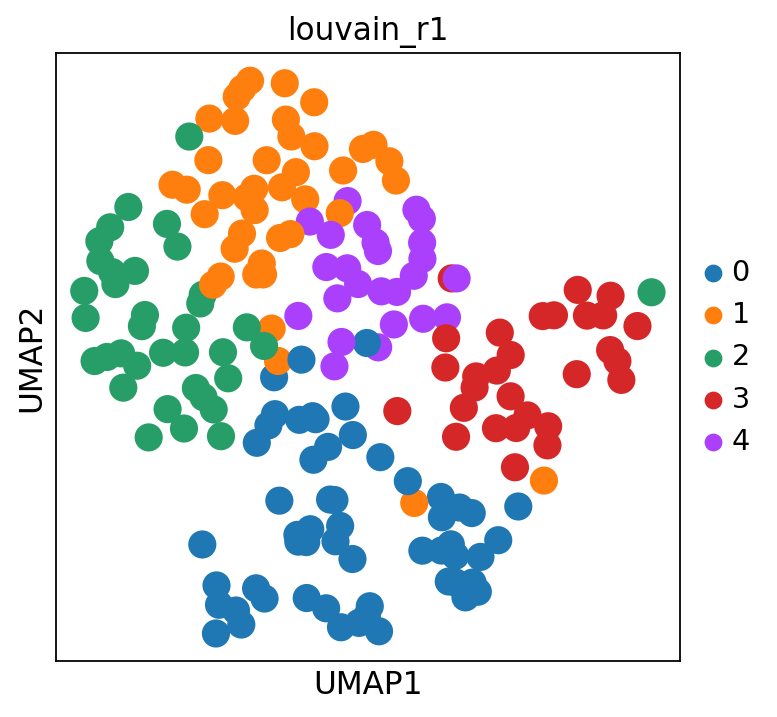

In [132]:
# Perform clustering - using highly variable genes ### maybe change to Leiden
louvain_paramenters = [1]
louvain_names = []
for value in louvain_paramenters:
    louvain_names.append('louvain_r' + str(value))

for value,name in zip(louvain_paramenters,louvain_names):
    sc.tl.louvain(adata, resolution=value, key_added=name)
rcParams['figure.figsize']=(5,5)

#Visualize the clustering and how this is reflected by different technical covariates
for name in louvain_names:
    sc.pl.umap(adata, color=name, save = 'UMIs/louvain/'+name + '_NEFH_and_controls.png')
#sc.pl.umap(adata, color=['log_counts','stimuli'])

In [133]:
### Define list of relevant genes 

low_marker_genes = ['Scn10a']

high_marker_genes = ['Pvalb','Calb1']


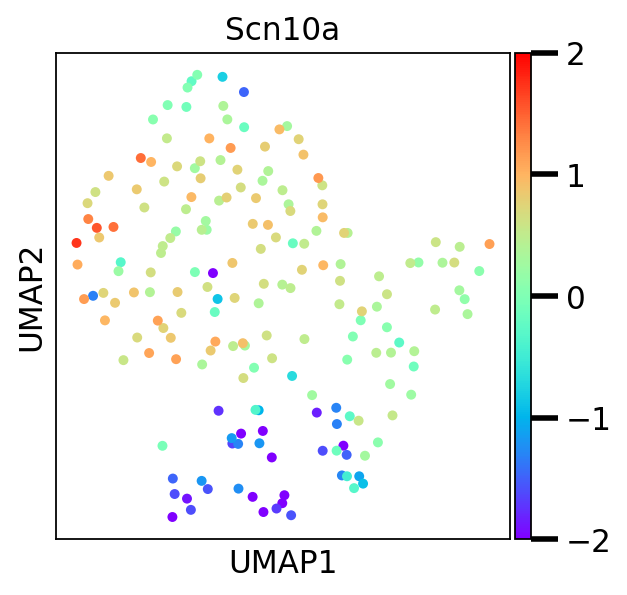

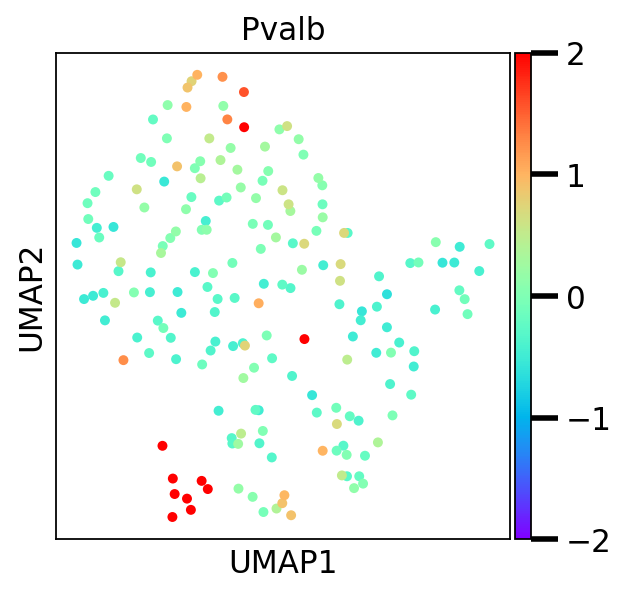

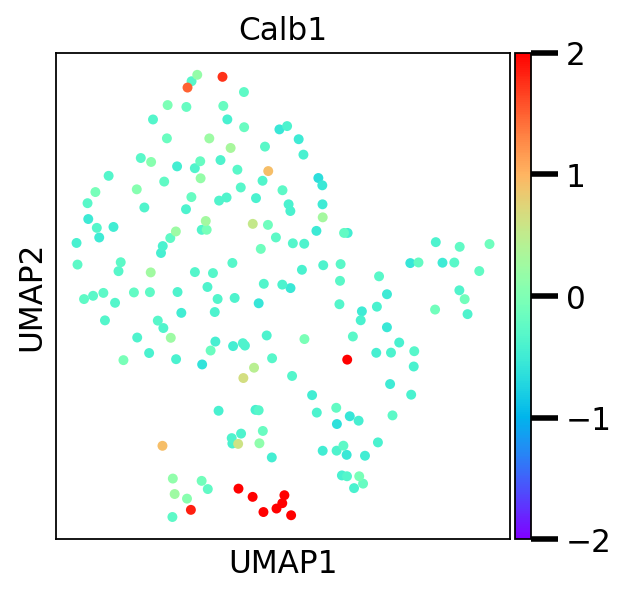

In [134]:
### Run plotting umap with color code according to gene expression
rcParams['figure.figsize']=(4,4)

np.in1d(low_marker_genes, adata.var_names)
for gene in low_marker_genes:
    sc.pl.umap(adata=adata, color=gene, use_raw=False, cmap = 'rainbow',save = 'UMIs/expression/low_genes_' + gene + '_NEFH.png', size = 80,
              vmin=-2, vmax=2)

np.in1d(high_marker_genes, adata.var_names)
for gene in high_marker_genes:
    sc.pl.umap(adata=adata, color=gene, use_raw=False, cmap = 'rainbow',save = 'UMIs/expression/high_genes_' + gene + '_NEFH.png', size = 80,
              vmin=-2, vmax=2)

In [135]:
### create and exportable varable list of genes names
gene_name = []
for i in range(len(adata.var['gene_name'])):
    gene_name.append(adata.var['gene_name'].iloc[i])

 

In [136]:
low_marker_gene_index = gene_name.index('Scn10a')

high_marker_gene_index1 = gene_name.index('Pvalb')

high_marker_gene_index2 = gene_name.index('Calb1')

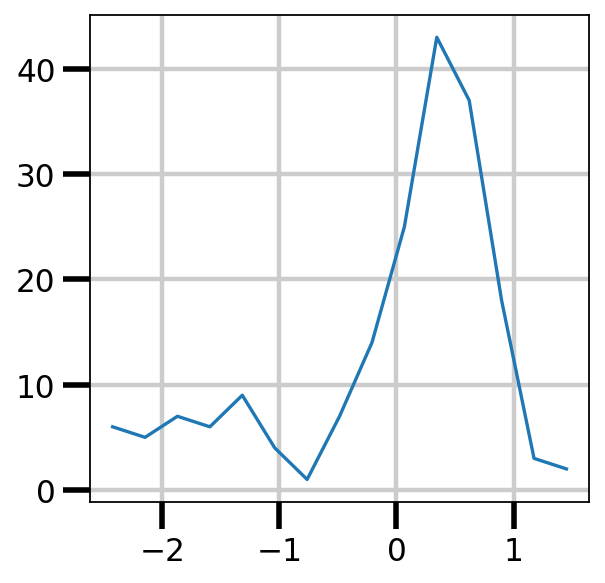

In [137]:
low_x_values = adata.X[:,low_marker_gene_index]
[a,b] = np.histogram(low_x_values,15)
plt.plot(b[:-1],a)

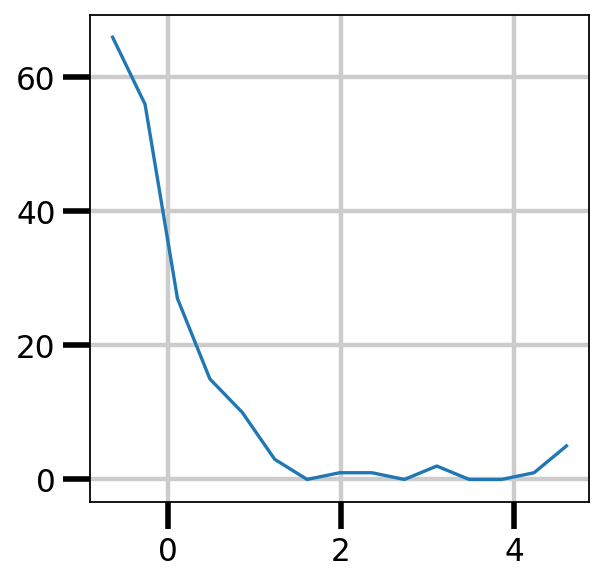

In [138]:
high_x_values = adata.X[:,high_marker_gene_index1]
[a,b] = np.histogram(high_x_values,15)
plt.plot(b[:-1],a)

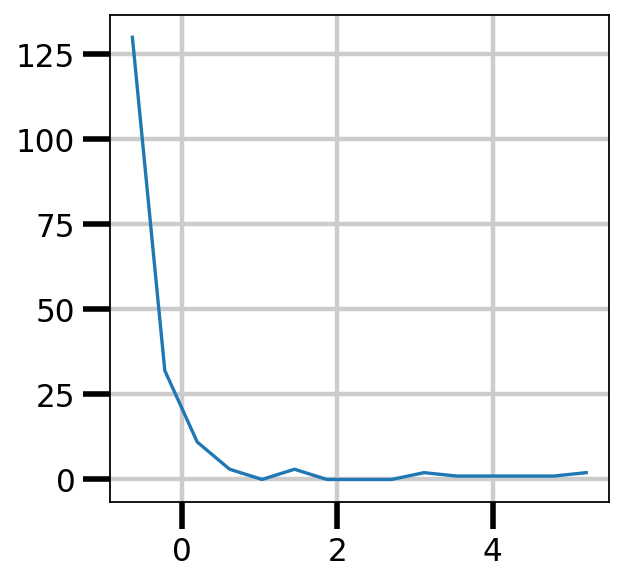

In [139]:
high_x_values = adata.X[:,high_marker_gene_index2]
[a,b] = np.histogram(high_x_values,15)
plt.plot(b[:-1],a)

In [140]:
selected_cells = np.logical_and(adata.X[:,low_marker_gene_index]>-1,adata.X[:,high_marker_gene_index1]<2,adata.X[:,high_marker_gene_index2]<1)

In [141]:
print(adata.shape)
adata = adata[selected_cells,:]
print(adata.shape)

(187, 16000)
(151, 16000)


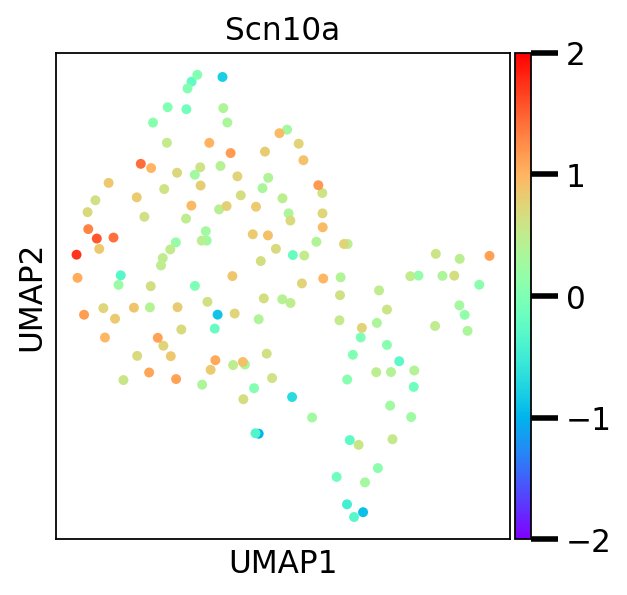

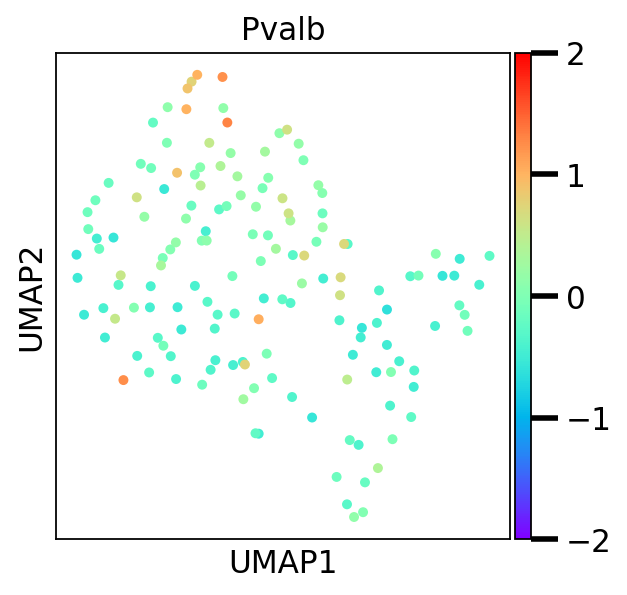

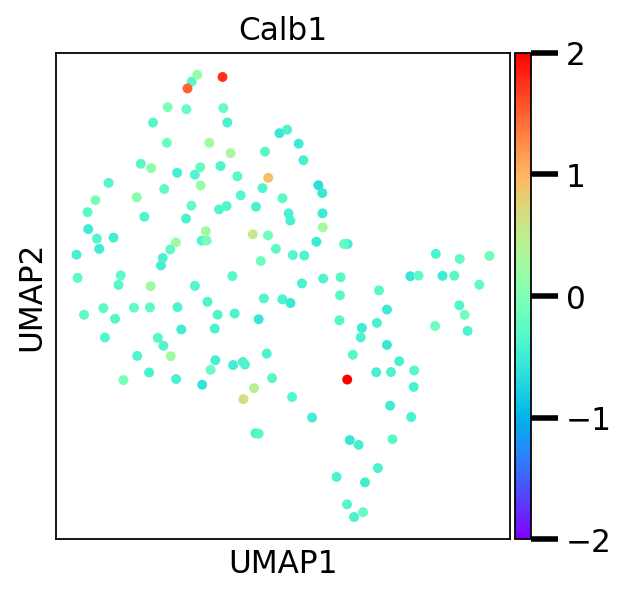

In [142]:
### Run plotting umap with color code according to gene expression
rcParams['figure.figsize']=(4,4)

np.in1d(low_marker_genes, adata.var_names)
for gene in low_marker_genes:
    sc.pl.umap(adata=adata, color=gene, use_raw=False, cmap = 'rainbow',save = 'UMIs/expression/low_genes_' + gene + '_NEFH_new.png', size = 80,
              vmin=-2, vmax=2)

np.in1d(high_marker_genes, adata.var_names)
for gene in high_marker_genes:
    sc.pl.umap(adata=adata, color=gene, use_raw=False, cmap = 'rainbow',save = 'UMIs/expression/high_genes_' + gene + '_NEFH_new.png', size = 80,
              vmin=-2, vmax=2)

computing PCA
    with n_comps=20
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing tSNE
    using 'X_pca' with n_pcs = 20
    using sklearn.manifold.TSNE


/home/melma31/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


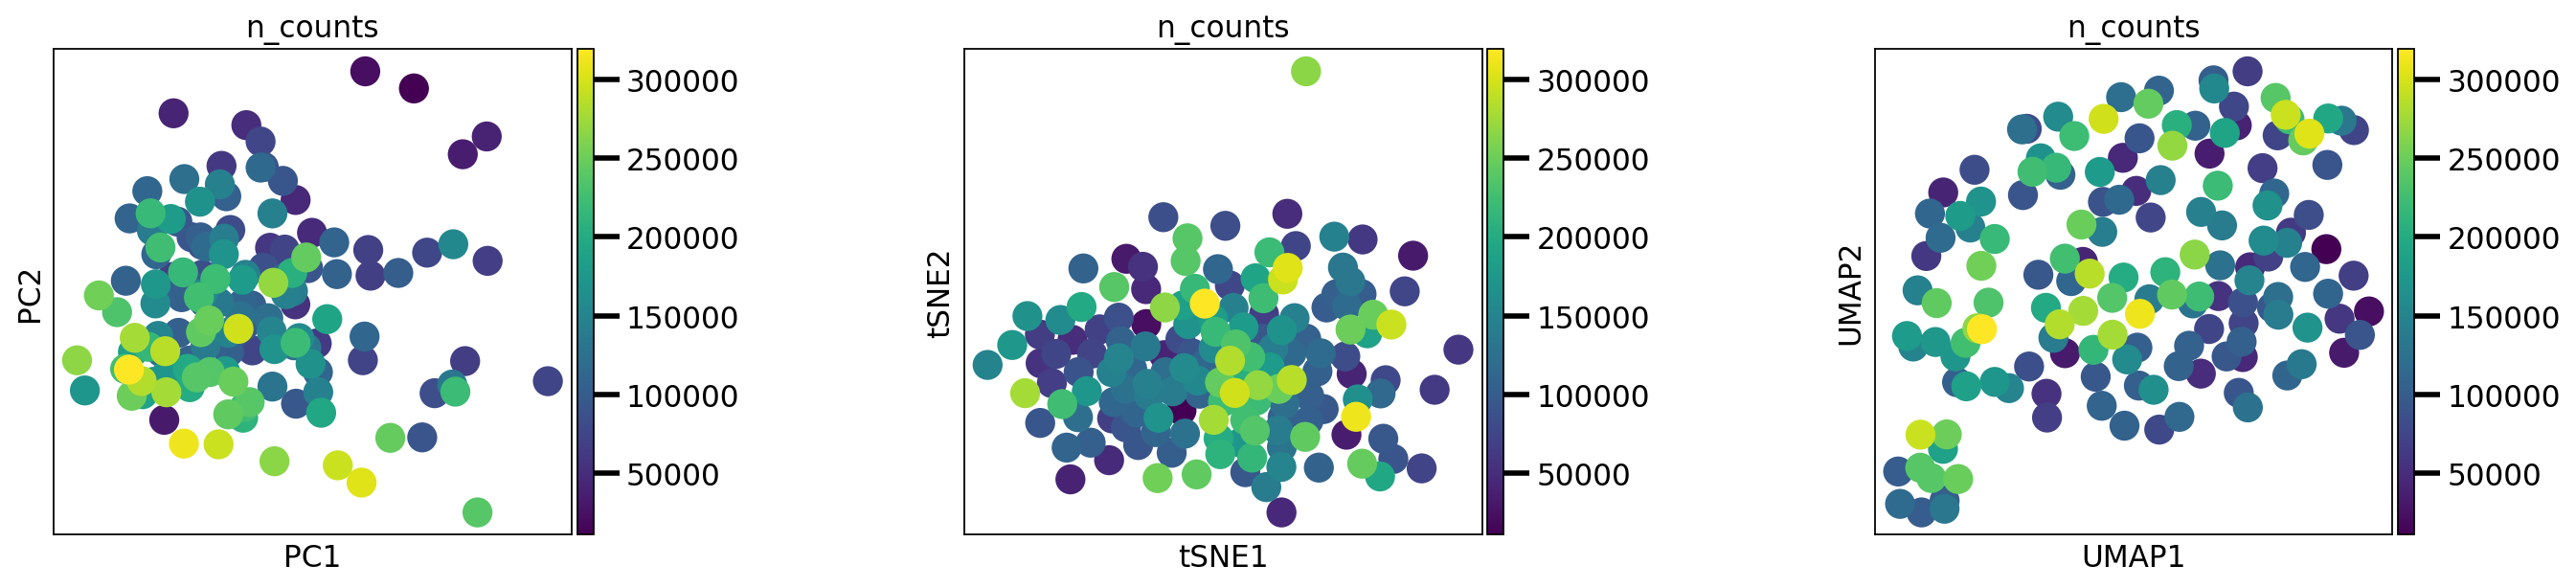

In [143]:
N_selected = 20
sc.pp.pca(adata, n_comps=N_selected, use_highly_variable=True, svd_solver='arpack')
#sc.pp.pca(adata, n_comps=N_selected, svd_solver='arpack')

#sc.pl.pca_variance_ratio(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)
sc.tl.umap(adata)

from matplotlib import rcParams

rcParams['figure.figsize']=(20,10)
fig_ind=np.arange(231, 237)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p10 = sc.pl.pca_scatter(adata, color='n_counts', ax=fig.add_subplot(fig_ind[0]), show=False)
p11 = sc.pl.tsne(adata, color='n_counts', ax=fig.add_subplot(fig_ind[1]), show=False)
p12 = sc.pl.umap(adata, color='n_counts', ax=fig.add_subplot(fig_ind[2]), show=False)
#p13 = sc.pl.diffmap(adata, color='n_counts', components=['1,2'], ax=fig.add_subplot(fig_ind[3]),show=False)
#p14 = sc.pl.diffmap(adata, color='n_counts', components=['1,3'], ax=fig.add_subplot(fig_ind[4]), show=False)
#p15 = sc.pl.draw_graph(adata, color='n_counts', ax=fig.add_subplot(fig_ind[5]), show=False)

plt.show()

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain_r1', the cluster labels (adata.obs, categorical) (0:00:00)


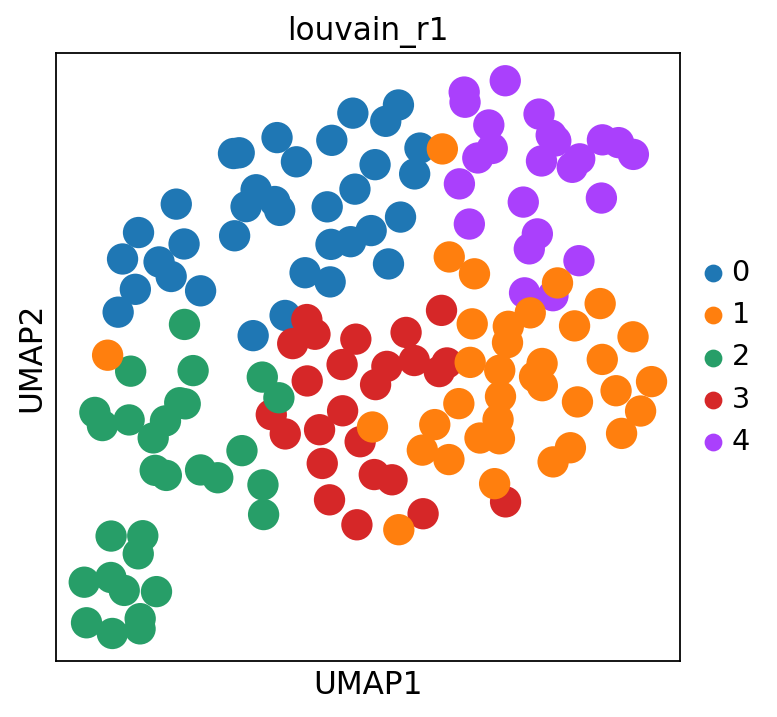

In [144]:
# Perform clustering - using highly variable genes ### maybe change to Leiden
louvain_paramenters = [1]
louvain_names = []
for value in louvain_paramenters:
    louvain_names.append('louvain_r' + str(value))

for value,name in zip(louvain_paramenters,louvain_names):
    sc.tl.louvain(adata, resolution=value, key_added=name)
rcParams['figure.figsize']=(5,5)

#Visualize the clustering and how this is reflected by different technical covariates
for name in louvain_names:
    sc.pl.umap(adata, color=name, save = 'UMIs/louvain/'+name + '_NEFH_new.png')
#sc.pl.umap(adata, color=['log_counts','stimuli'])

In [147]:
### Define list of relevant genes 

marker_genes = ['Krt79','Trpm3','Piezo2','Trpm2','Smr2','Sstr2','Bmpr1b','Trpm8','Trpv1','Piezo2','Piezo1','Nppb',
                'Sst','Pvalb','Prokr2','Mrgprd','Mrgpra3','Cd34',
                'Th','Trpa1','Ntrk3','Ntrk2','Ntrk1','Ret','Tac1','Calca','Calcb','Nefh',
                'S100b','Scn10a','Slc17a8','Atf3','Pou4f3','Calb1','Calb2','Avil','Asic3',
                'Asic2','Asic1','Pou6f2','Avpr1a','Pou4f2','Sox10','Casq2','Chrna7','Chrna3',
                'P2rx3','Ldhb','Necab2','Spp1','Adm','Hpse','Adra2a']

###method 1

#marker_genes = ['Cox6b1','Ndufs7','Ndufa11','Micos13','Atp5j','Prdx5','Pin1','Atp5g1','Ndufab1','Uqcrc1','Eef1e1','Lamtor4','Atp5pb',
#                'Timm8b','Dpcd','Uqcc3','Ttc1','Nudc','Atp5e','Selenom']

#marker_genes = ['Scn9a','Gcnt2','Cyfip2','Dpysl2','Kalrn','Nav1','Osbpl3','Gnao1','Syt4','Zbtb20','Ank2','Rbms3',
#                'Ppp3ca','Ttc3','Lonrf1','Lrrc8b','Tmem30a','Scd2','Prrc2b','Dhcr24']

###method 2

marker_genes = ['Ndufs7','Uqcrc1','Cox6b1','Pin1','Atp5g1','Atp5j','Atox1','Ndufa11','Eef1e1','Lamtor4','Dpcd',
                'Prdx5','Micos13','Ccdc124','Selenom','Ttc1','Atp5pb','Naa38','Ppm1j','Stip1']

marker_genes = ['Cyfip2','Scn9a','Gcnt2','Purb','Rbms3','Ank2','Mindy2','Mbnl1','Scd2','Lrrc8b','Ppp3ca','Gsk3b','Npepps',
                'Ccser2','Usp34','Rims3','Apc','Syt4','Pura','Ttc3']


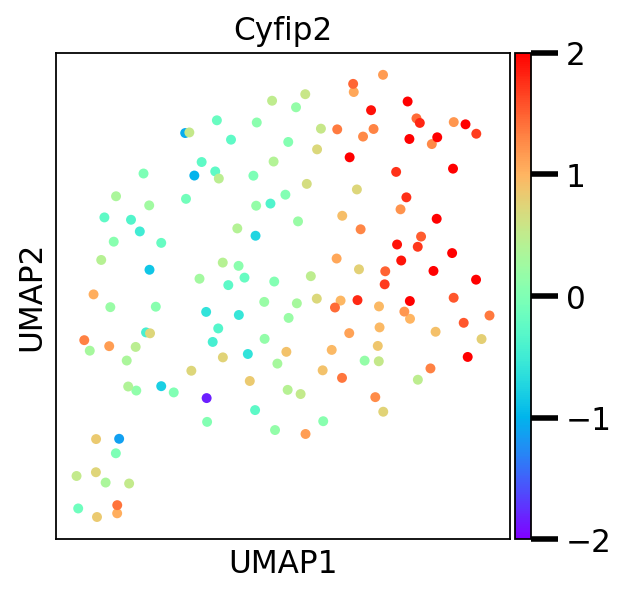

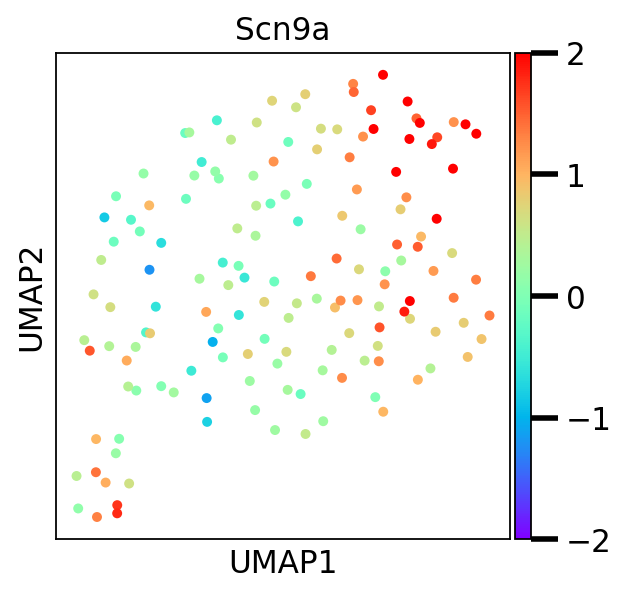

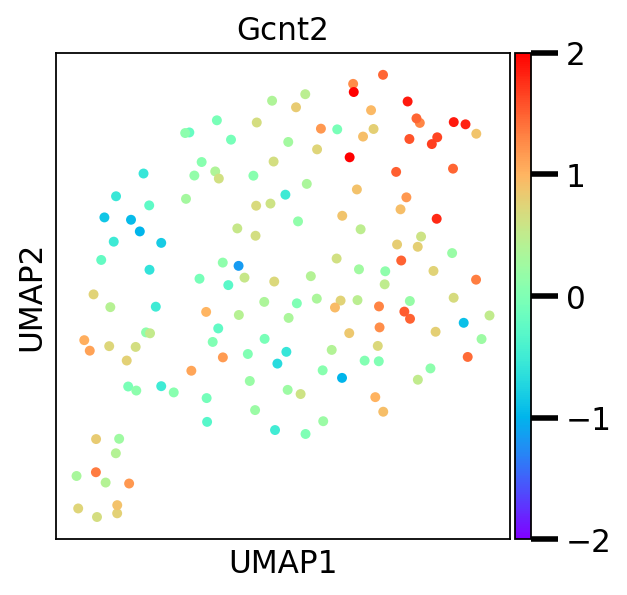

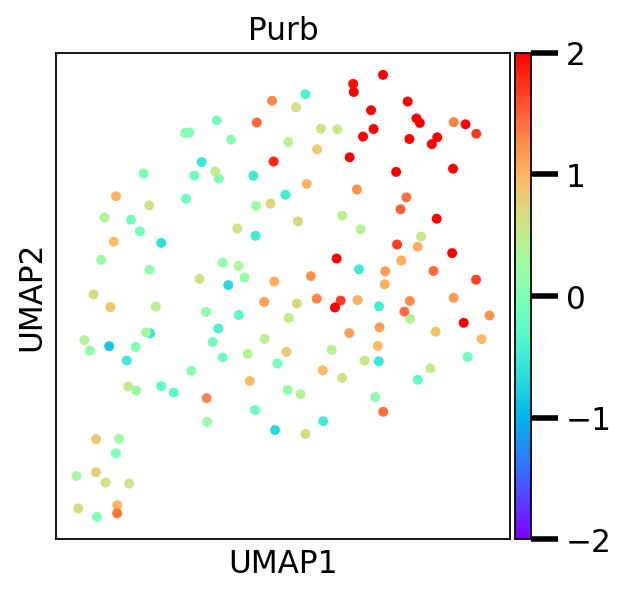

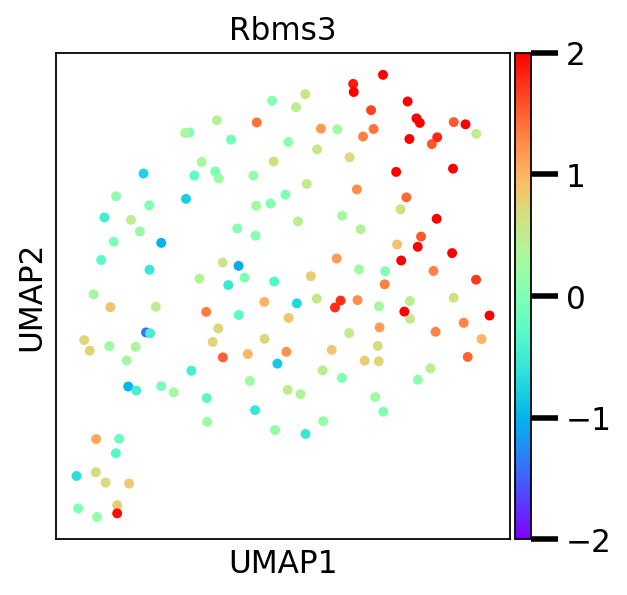

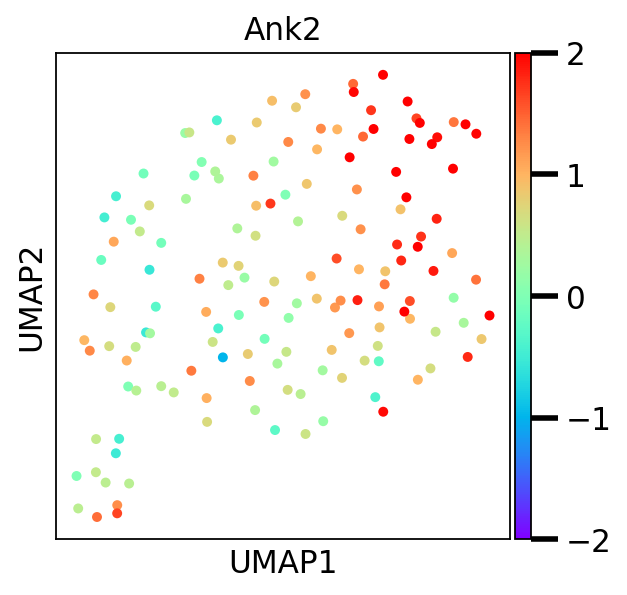

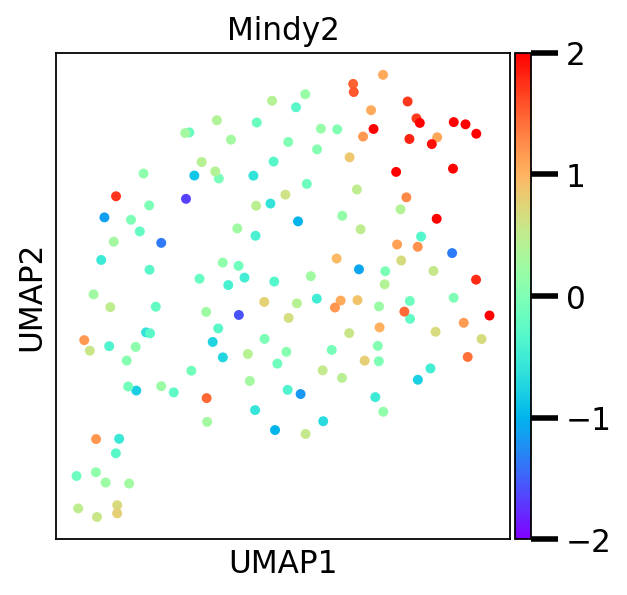

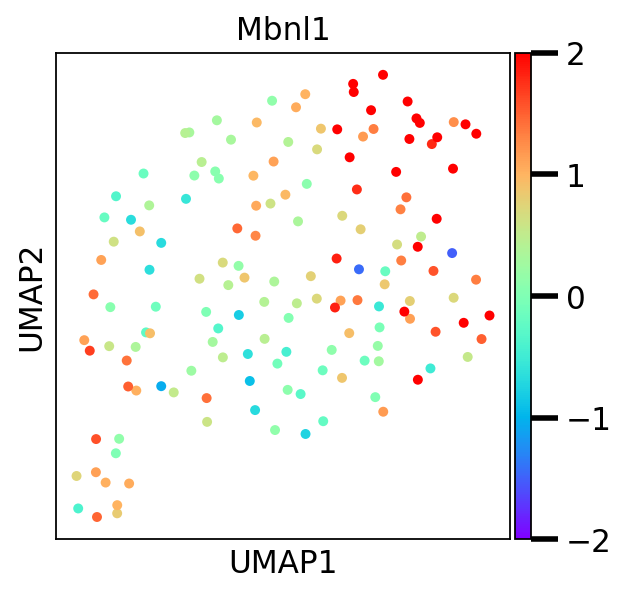

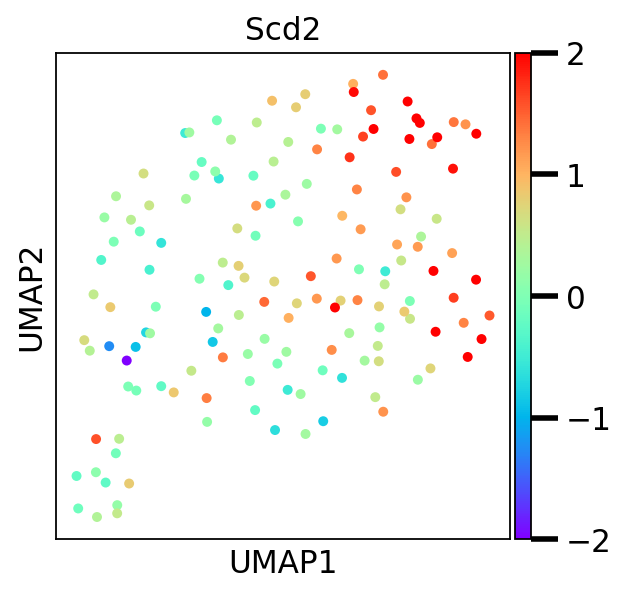

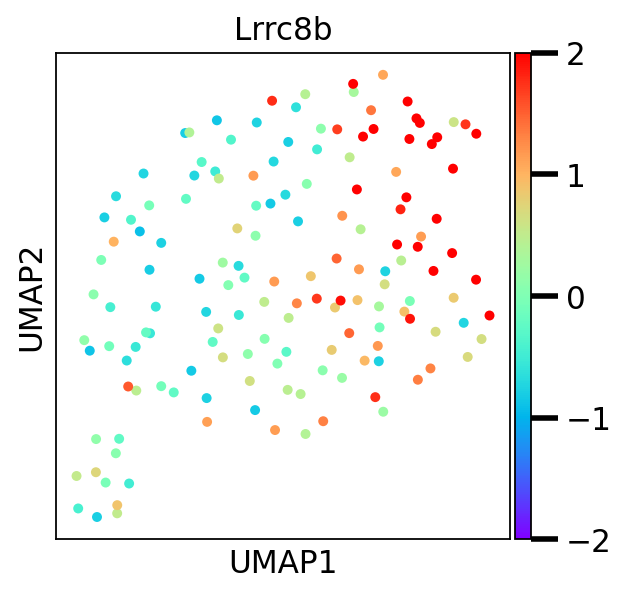

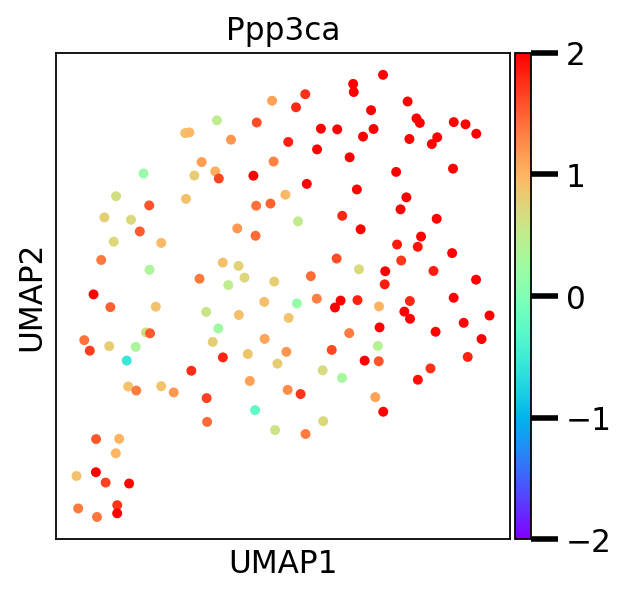

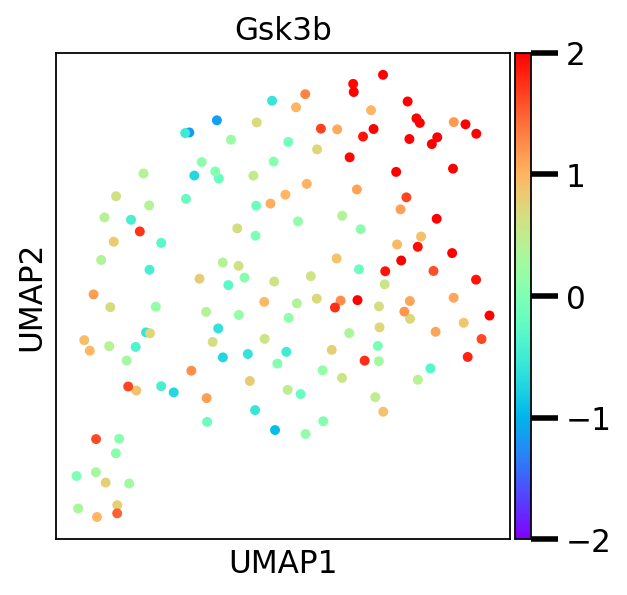

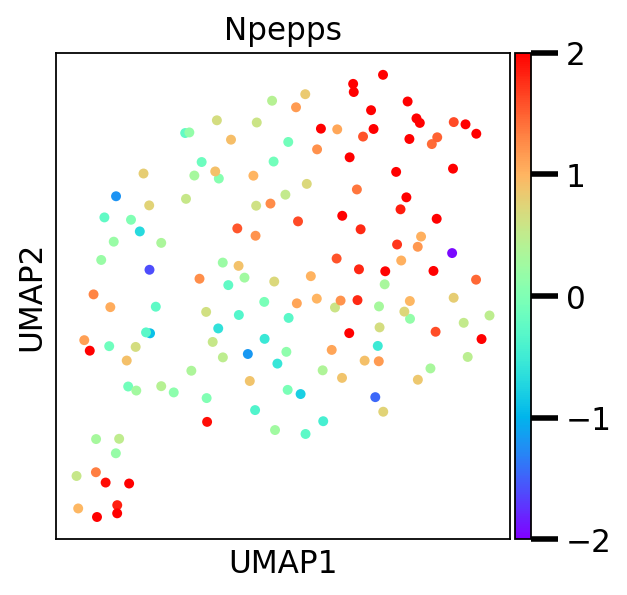

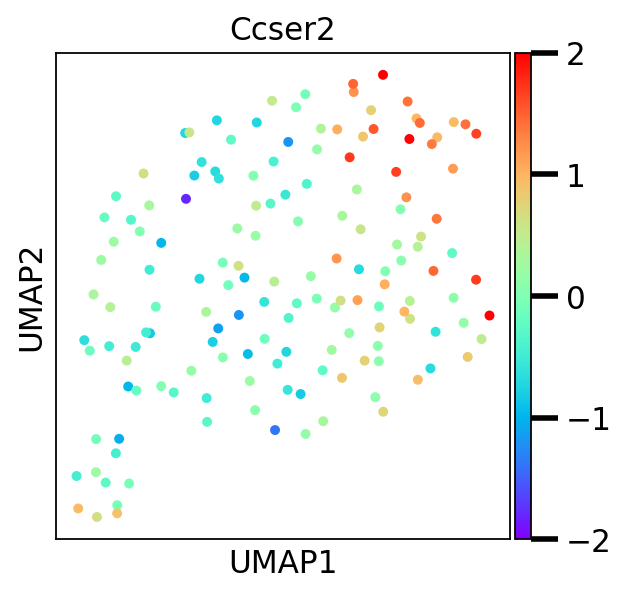

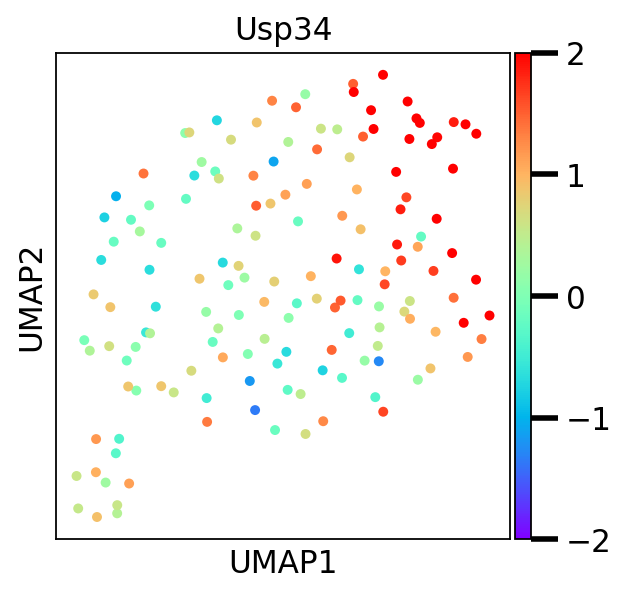

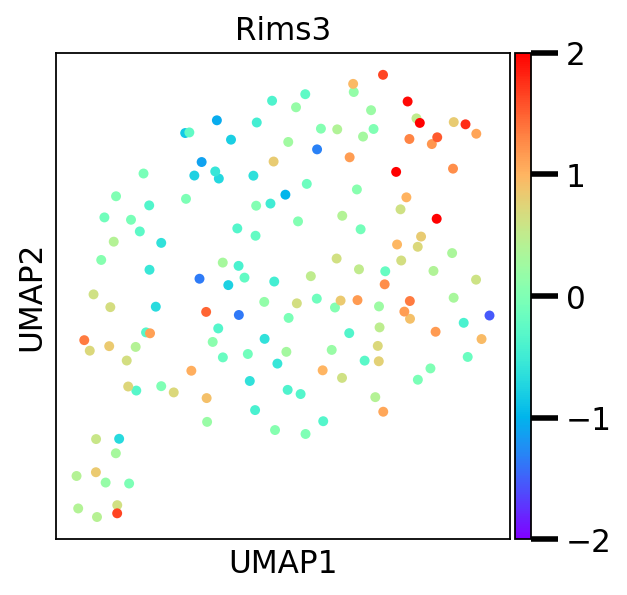

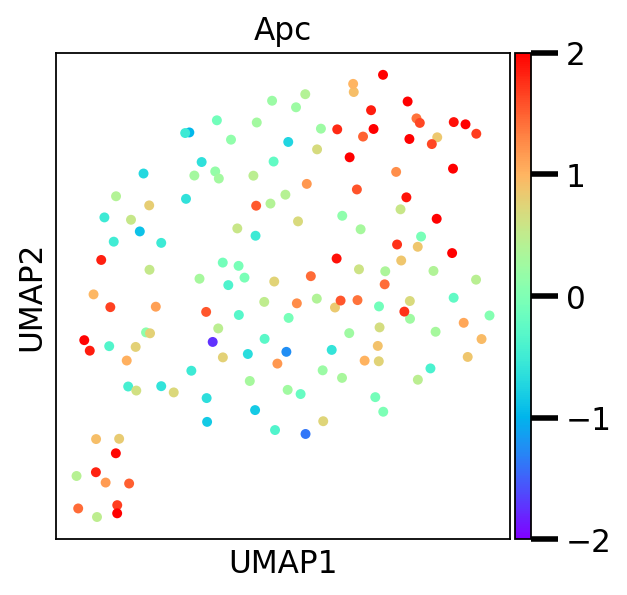

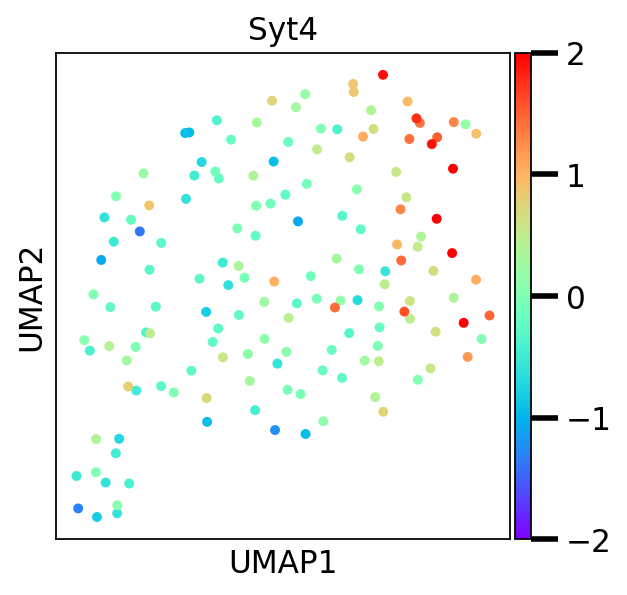

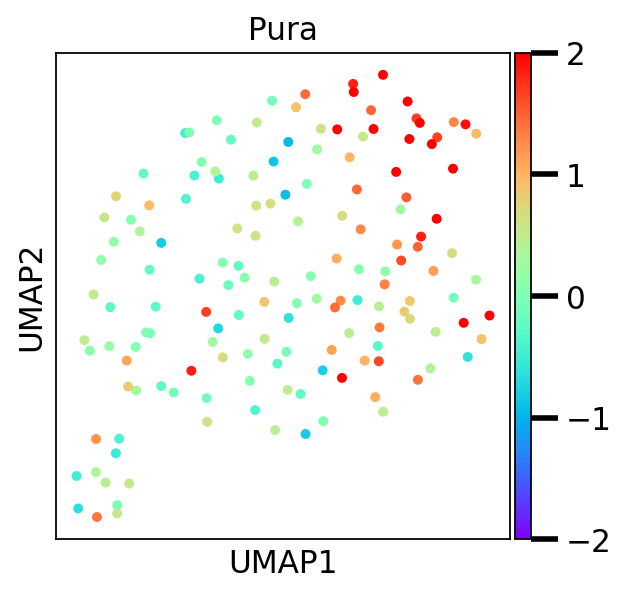

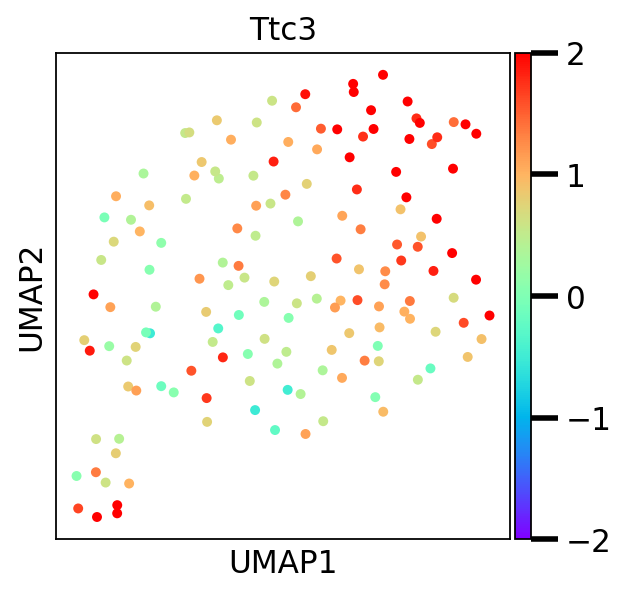

In [148]:
### Run plotting umap with color code according to gene expression
rcParams['figure.figsize']=(4,4)

np.in1d(marker_genes, adata.var_names)
for gene in marker_genes:
    sc.pl.umap(adata=adata, color=gene, use_raw=False, cmap = 'rainbow',save = 'UMIs/expression/genes_' + gene + '_NEFH_new_cluster4_method2.png', size = 80,
              vmin=-2, vmax=2)

In [111]:
# Perform clustering - using highly variable genes ### maybe change to Leiden
louvain_paramenters = [0.3,0.5,1,1.5,2,2.5,3,3.5,4,4.5,6]
louvain_names = []
for value in louvain_paramenters:
    louvain_names.append('louvain_r' + str(value))

for value,name in zip(louvain_paramenters,louvain_names):
    sc.tl.louvain(adata, resolution=value, key_added=name)
    

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 1 clusters and added
    'louvain_r0.3', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 3 clusters and added
    'louvain_r0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain_r1', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain_r1.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain_r2', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" pa

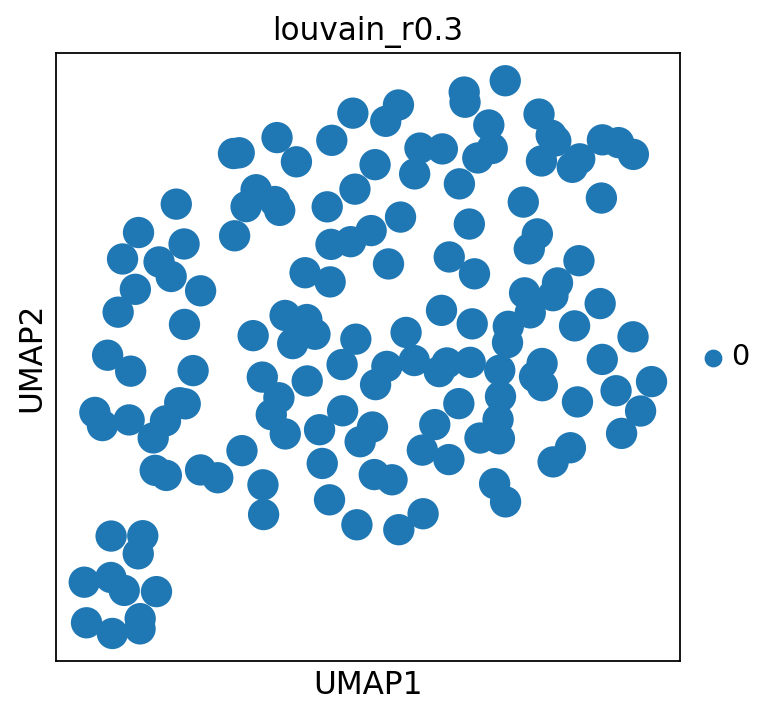

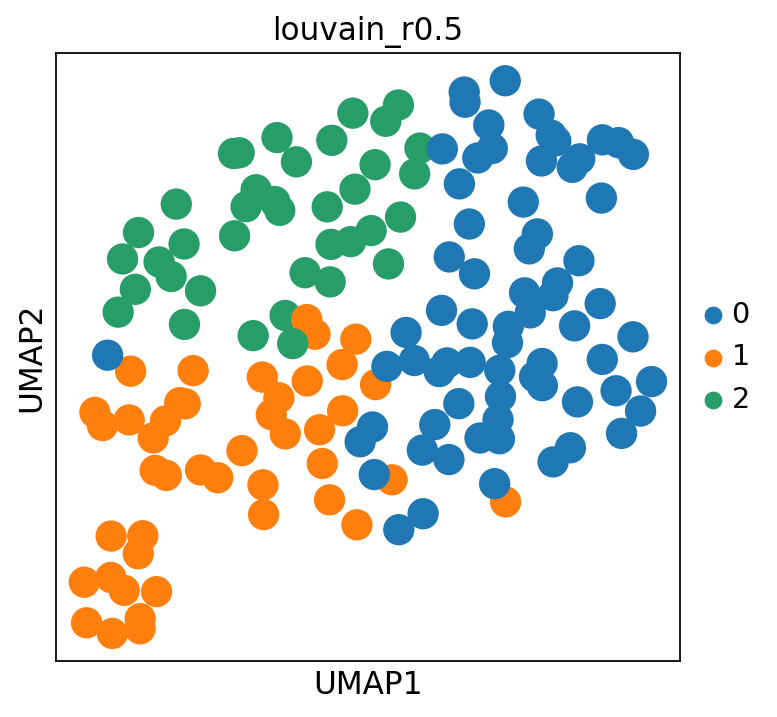

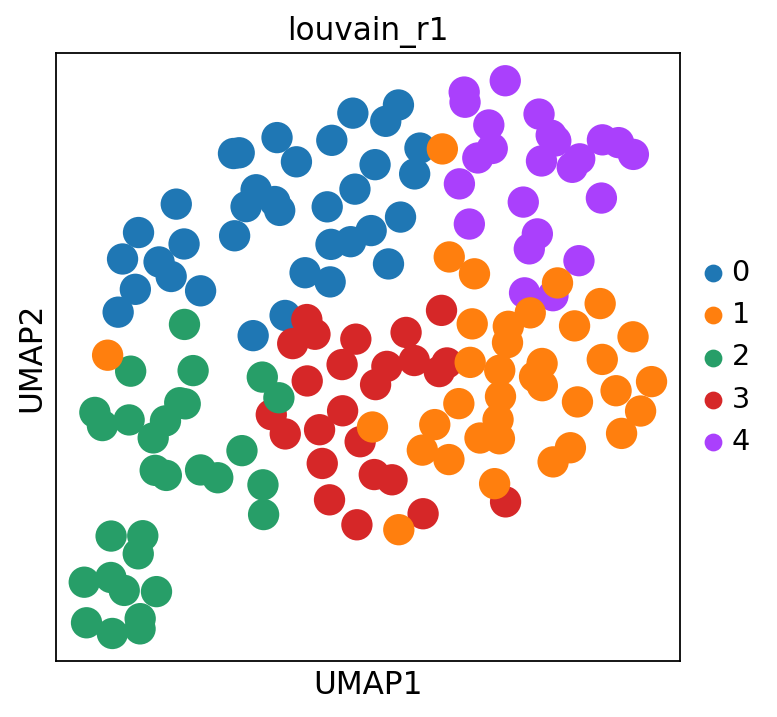

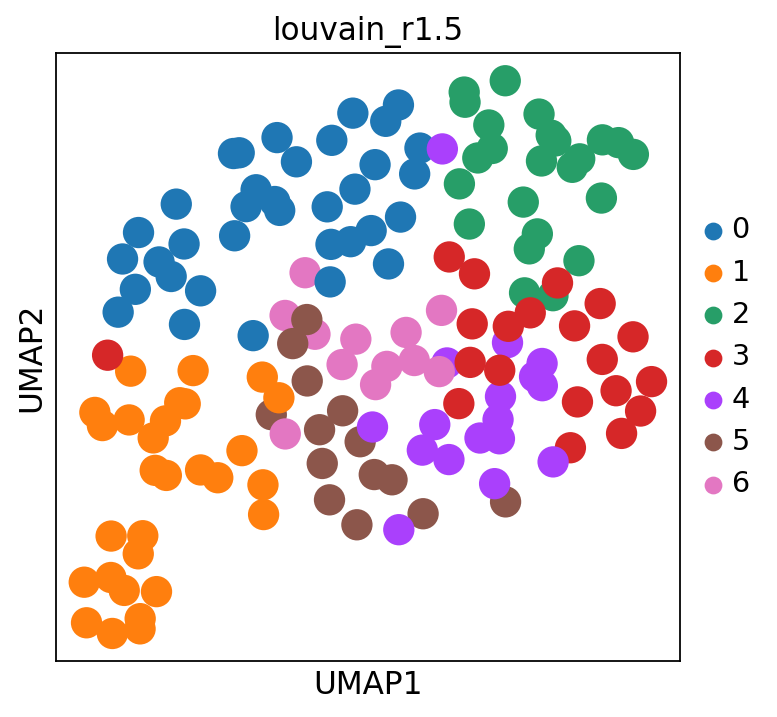

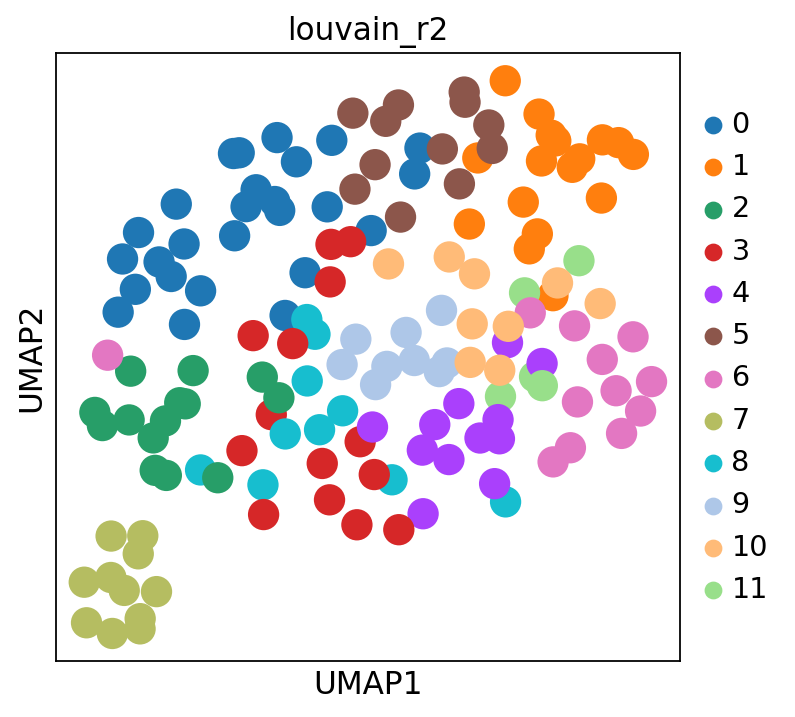

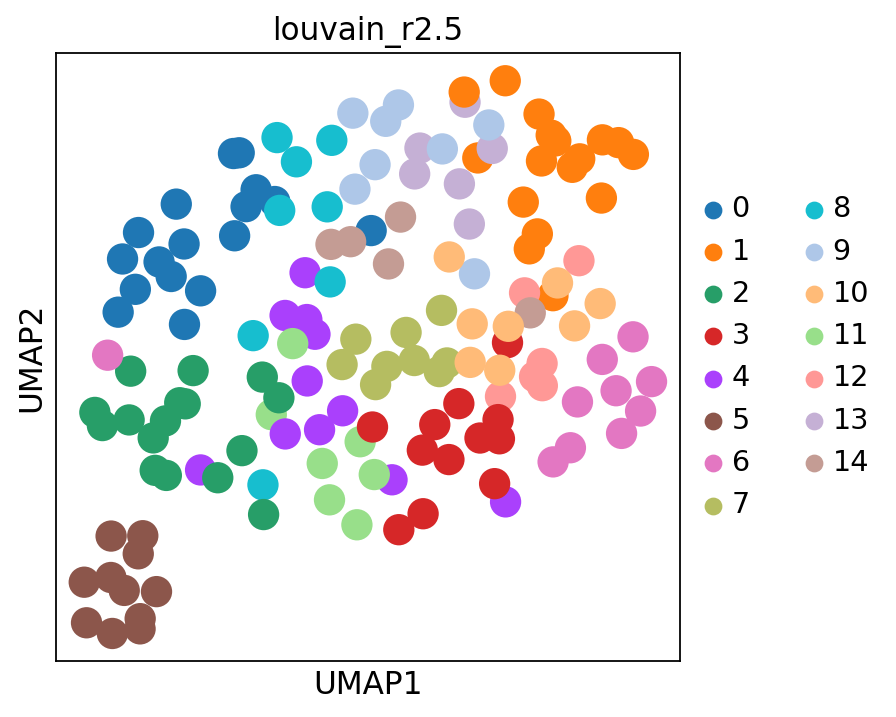

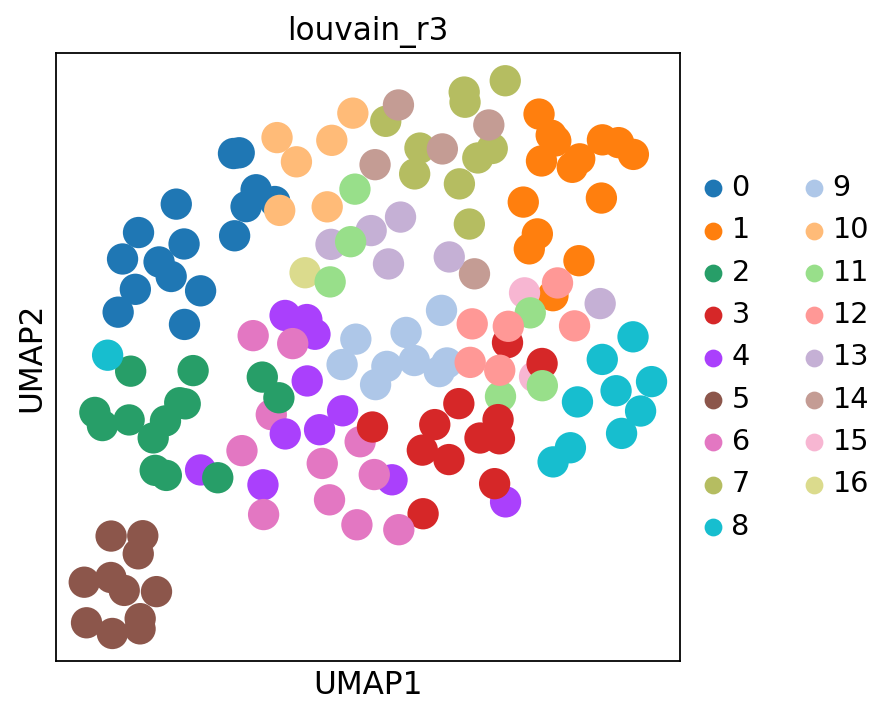

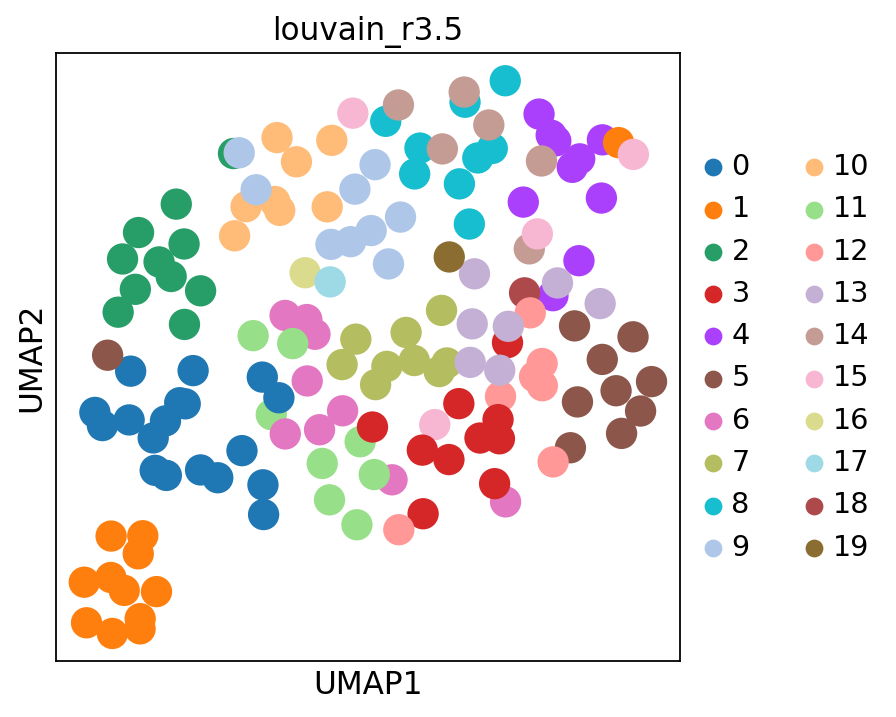

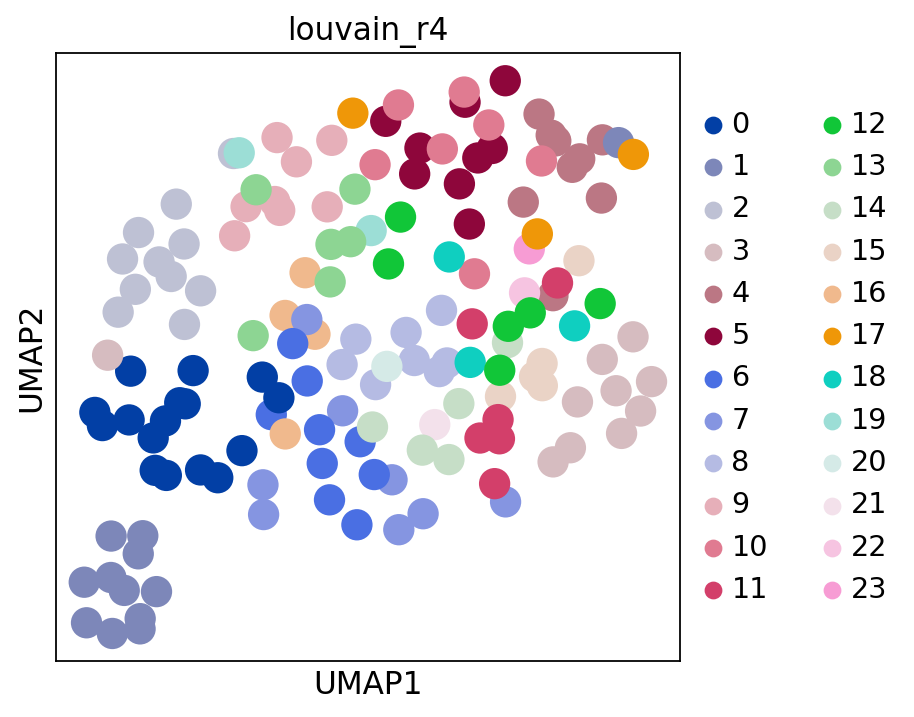

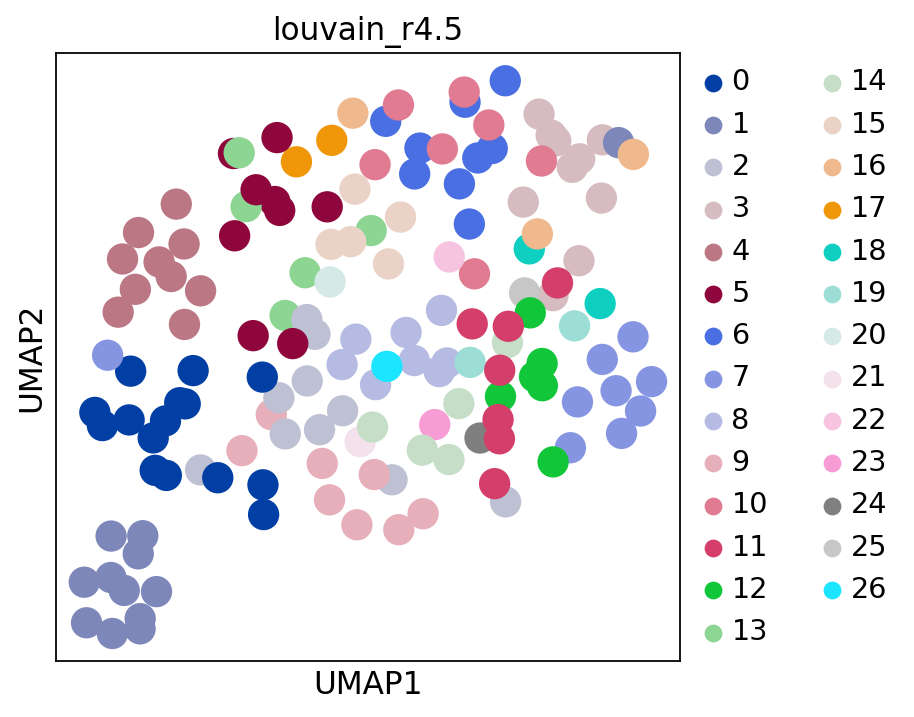

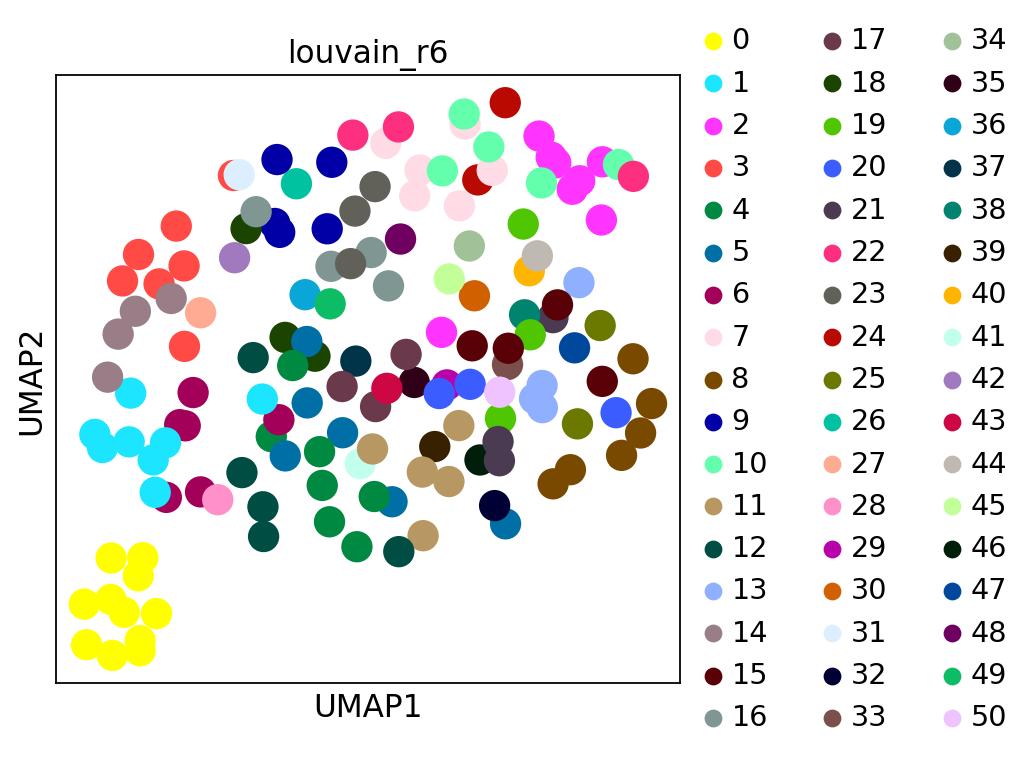

In [112]:
rcParams['figure.figsize']=(5,5)

#Visualize the clustering and how this is reflected by different technical covariates
for name in louvain_names:
    sc.pl.umap(adata, color=name, save = 'UMIs/louvain/'+name + '_NEFH_new.png')
#sc.pl.umap(adata, color=['log_counts','stimuli'])

In [124]:
sc.tl.rank_genes_groups(adata, 'louvain_r1', method='wilcoxon')
rank_genes_df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/melma31/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/melma31/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/melma31/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


In [125]:
rank_genes_df

    using 'X_pca' with n_pcs = 20
Storing dendrogram info using `.uns['dendrogram_louvain_r1']`


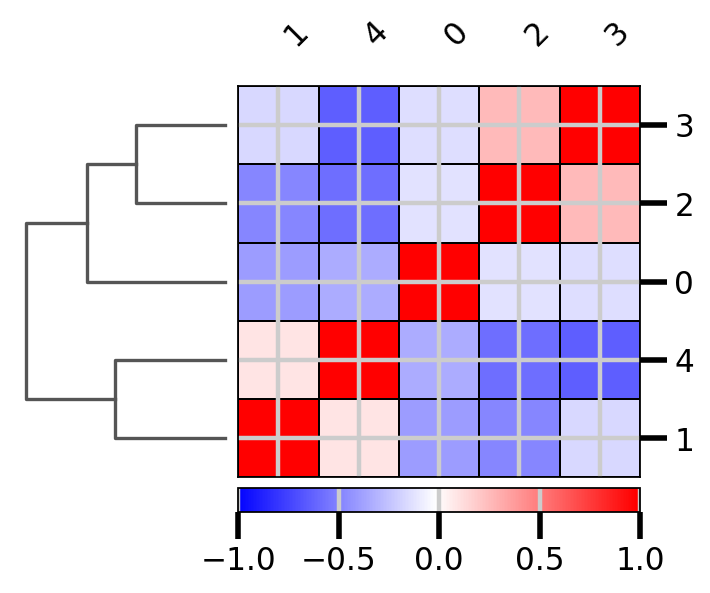

In [155]:
# compute hierarchical clustering using PCs (several distance metrics and linkage methods are available).
sc.tl.dendrogram(adata, 'louvain_r1')
ax = sc.pl.correlation_matrix(adata, 'louvain_r1', figsize=(5, 3.5))


In [115]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
    unique_index = []
 
    # traverse for all elements
    count = 0
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
            unique_index.append(count)
        count+=1
    return unique_list,unique_index
        
print(adata.shape)
gene_name = []
for i in range(len(adata.var['gene_name'])):
    gene_name.append(adata.var['gene_name'].iloc[i])

unique_genes , unique_genes_index = unique(gene_name)

adata = adata[:,np.array(unique_genes_index)]

    using 'X_pca' with n_pcs = 20
Storing dendrogram info using `.uns['dendrogram_louvain_r1']`
categories: 0, 1, 2, etc.
var_group_labels: 0, 4


/home/melma31/anaconda3/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:193: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = dat


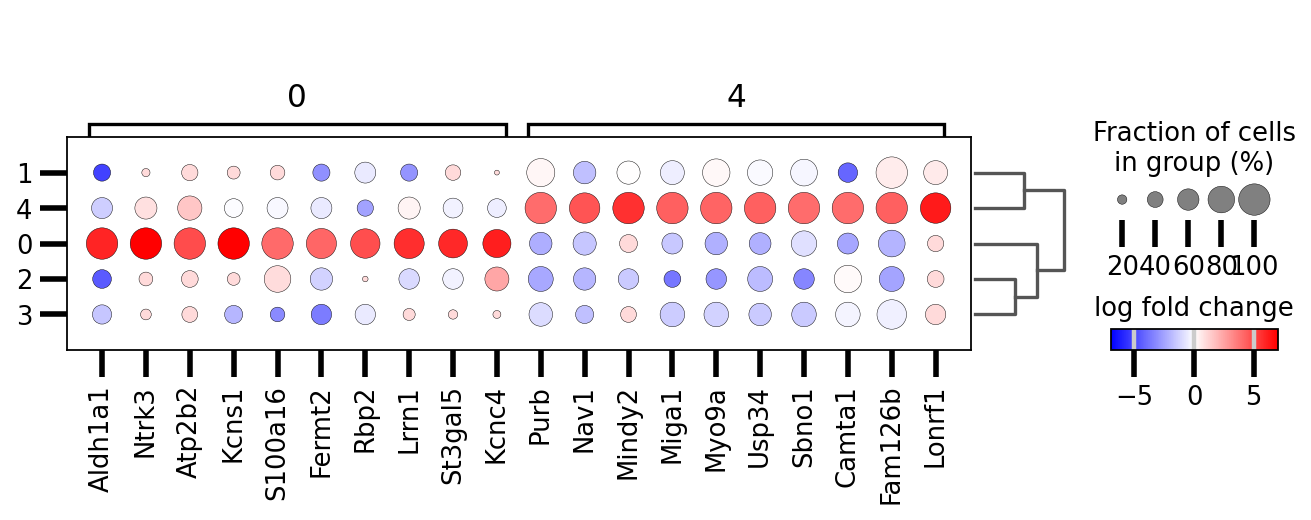

In [117]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    n_genes=10,
    values_to_plot="logfoldchanges",
    min_logfoldchange=4,
    vmax=7,
    vmin=-7,
    cmap="bwr",
    groups=["0", "4"],
)

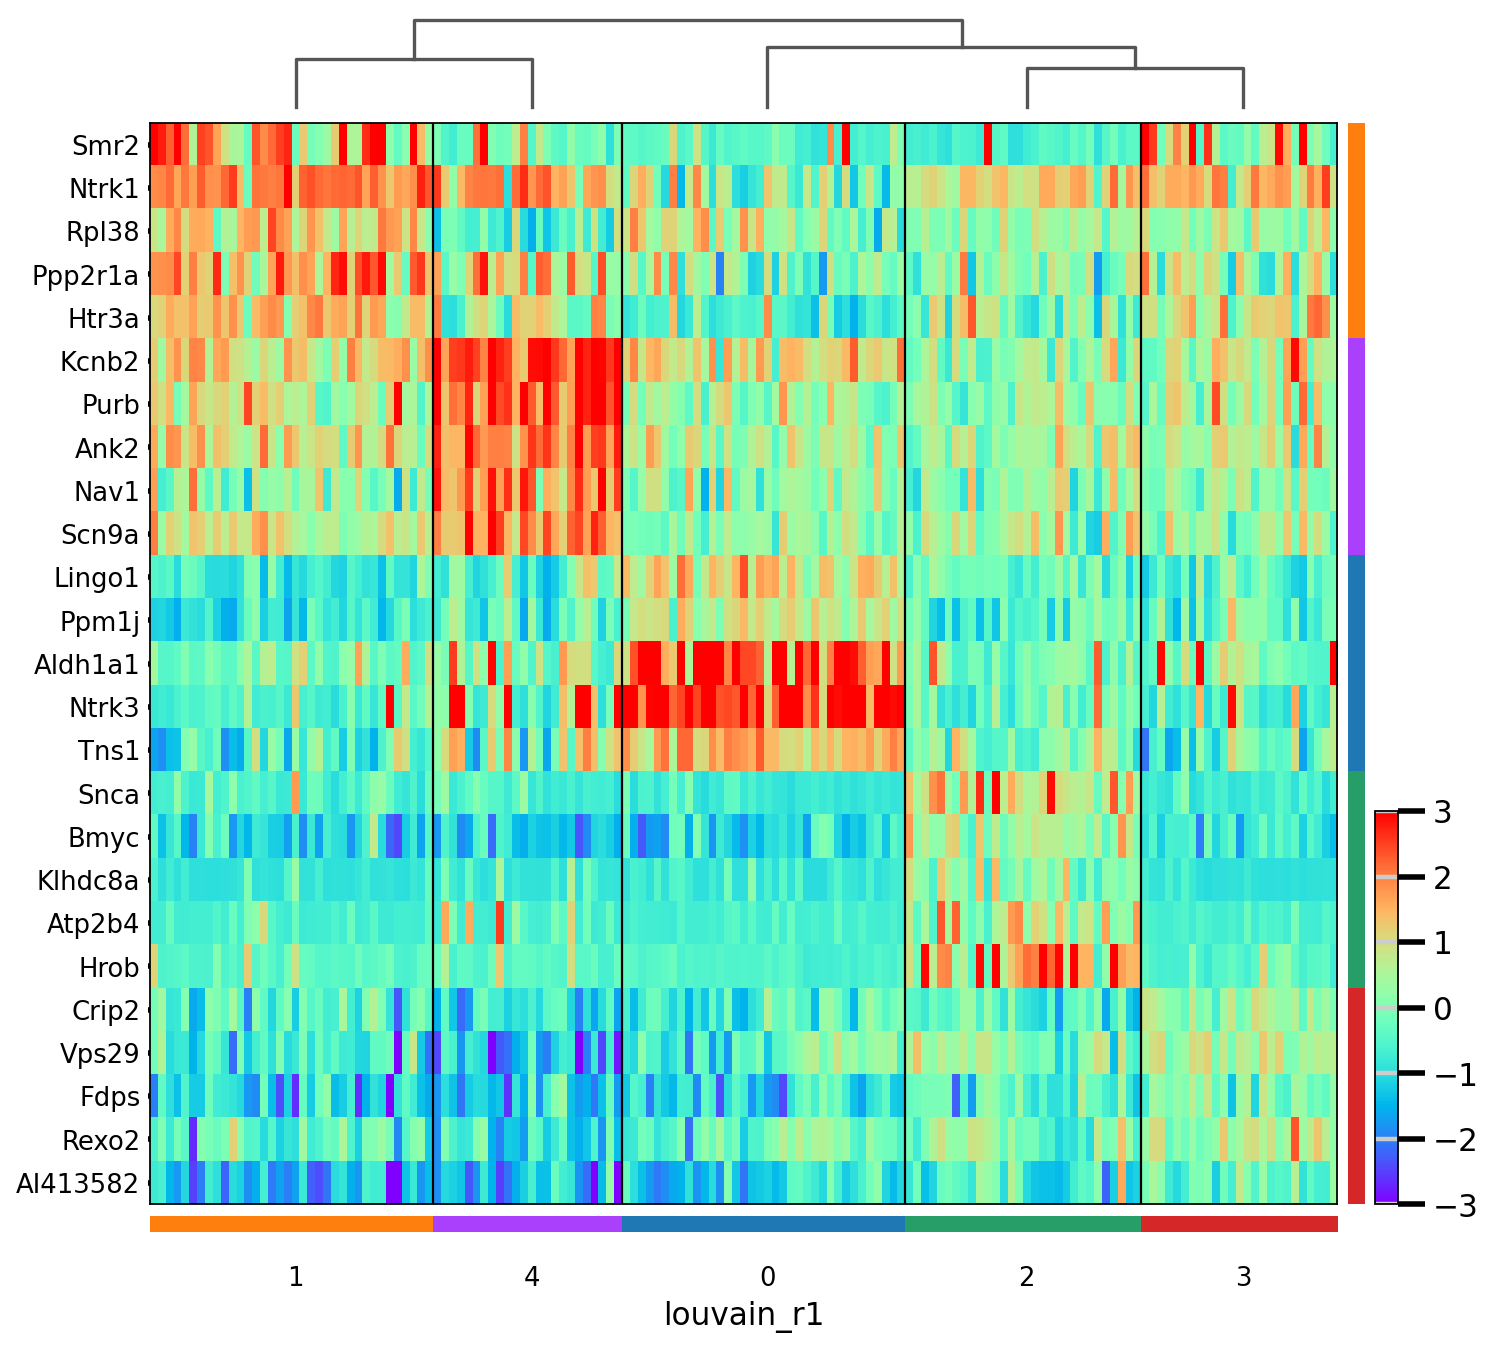

In [118]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, use_raw=False, show_gene_labels=True,swap_axes=True, vmin=-3, vmax=3, cmap='rainbow', figsize=(10,10), show=True, 
                               save = 'UMIs/characteristic_genes/'+'characteristic_genes_5_louvain_r1' + '_NEFH_new.png', dendrogram = True)

#sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False,
#                                vmin=-3, vmax=3, cmap='bwr')


In [120]:
cluster_id = np.zeros((adata.shape[0],))

for i in range(adata.shape[0]):
    cluster_id[i] = int(adata.obs['louvain_r1'][i])

In [121]:
selected_cluster = np.logical_or(cluster_id == 0, cluster_id == 4)

In [122]:
adata = adata[selected_cluster,:]

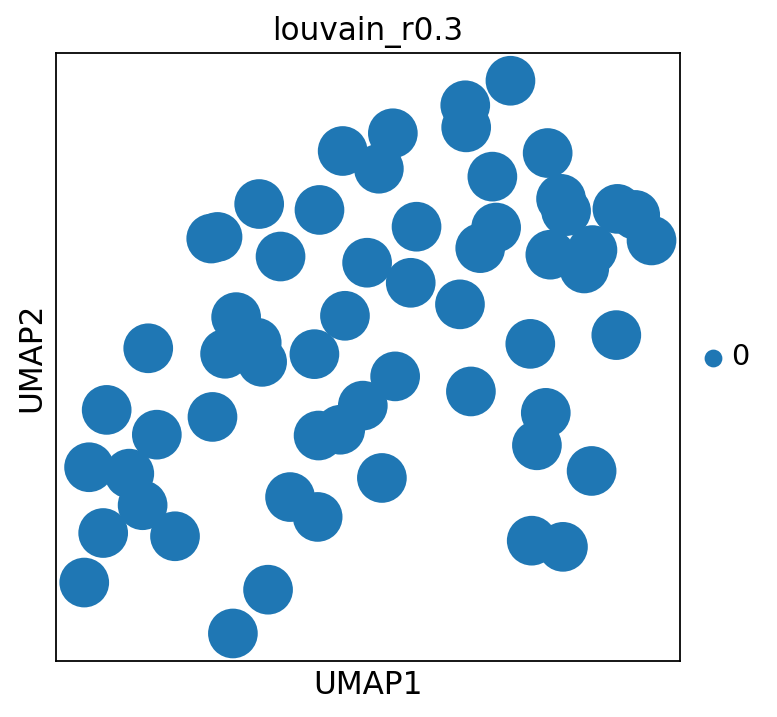

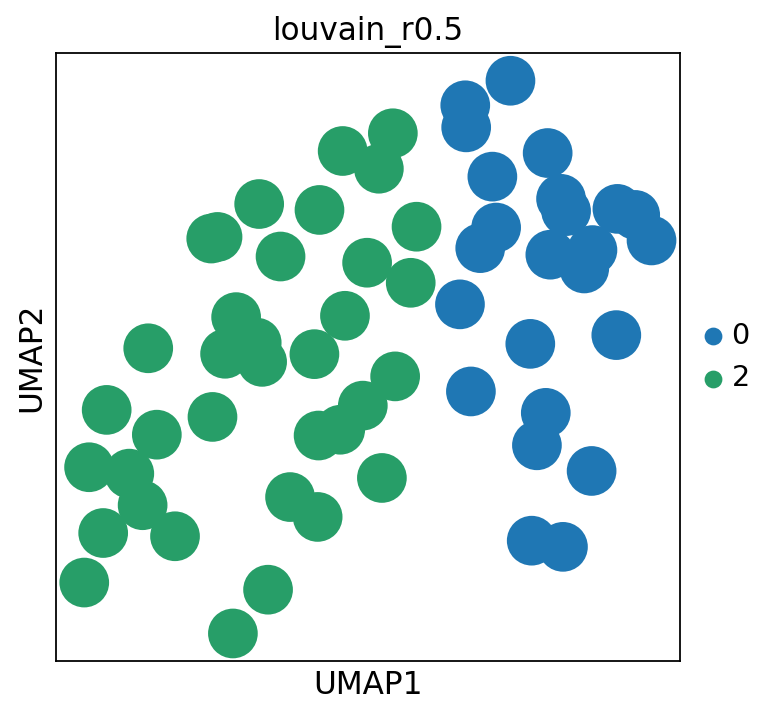

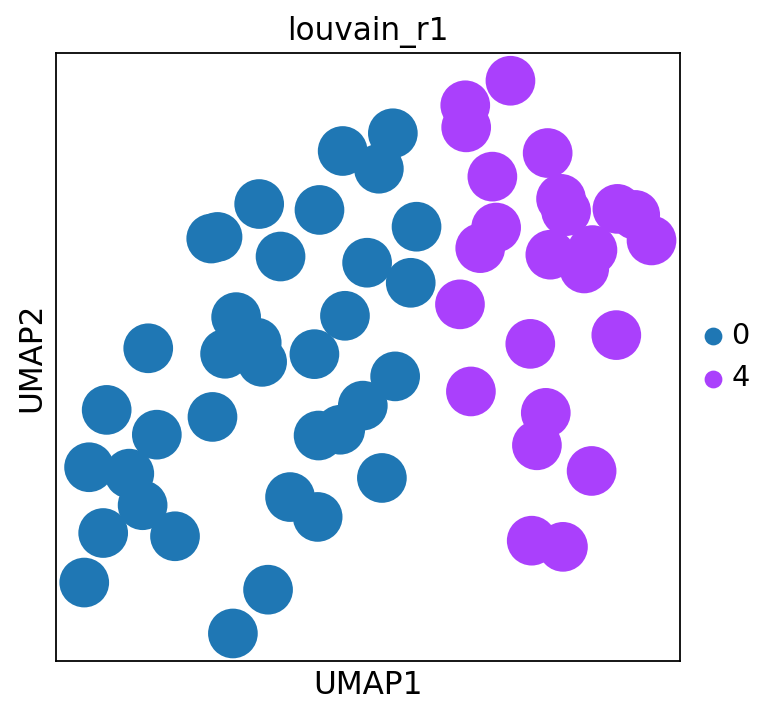

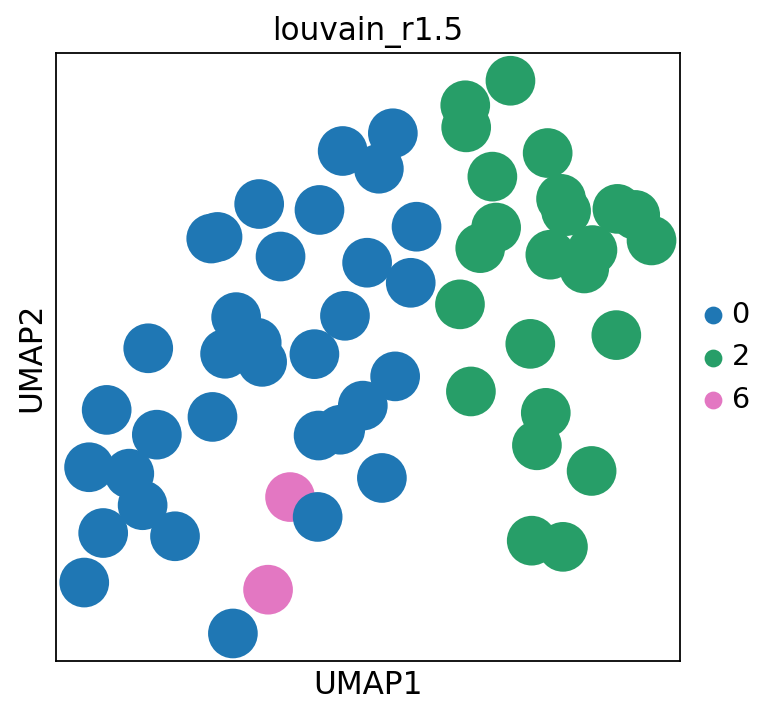

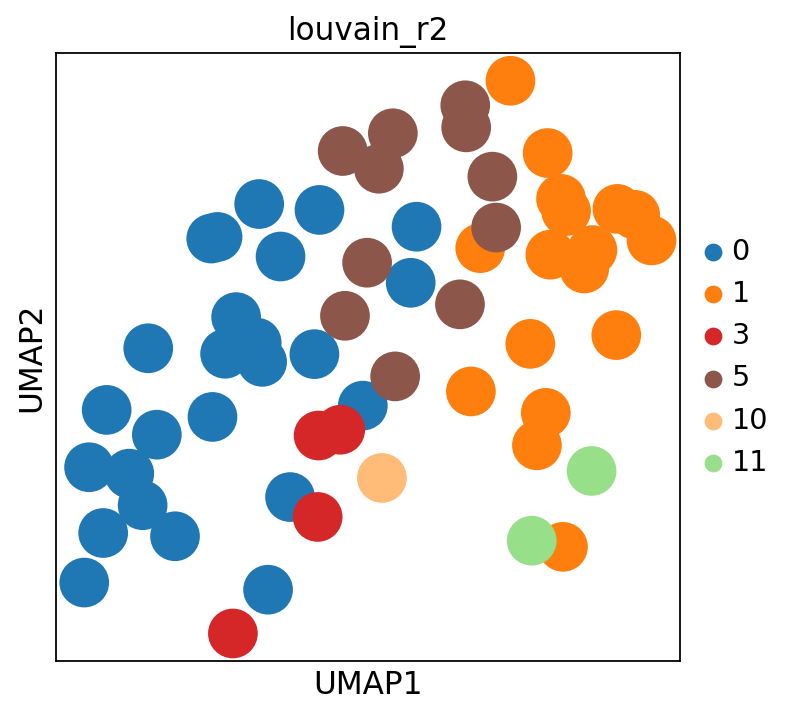

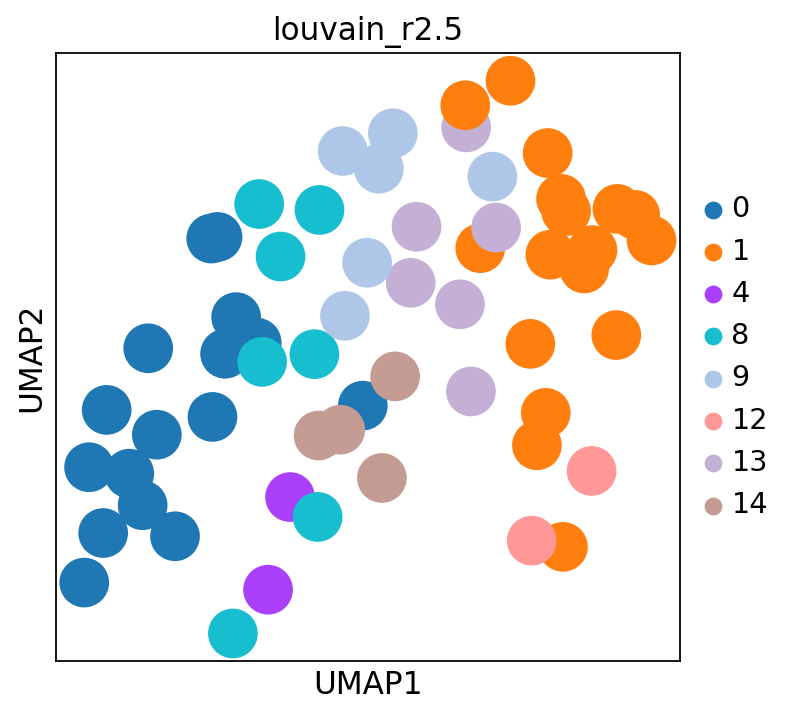

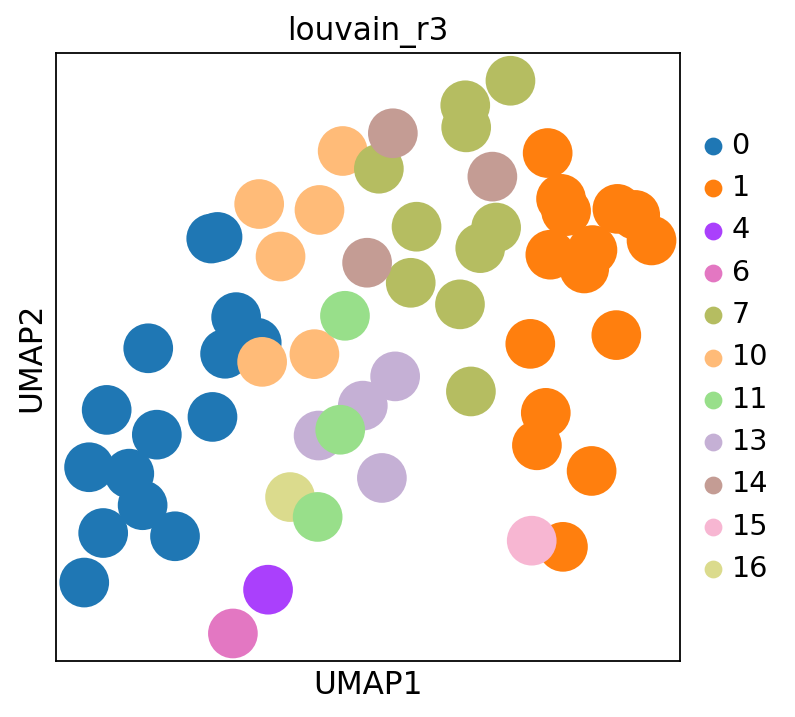

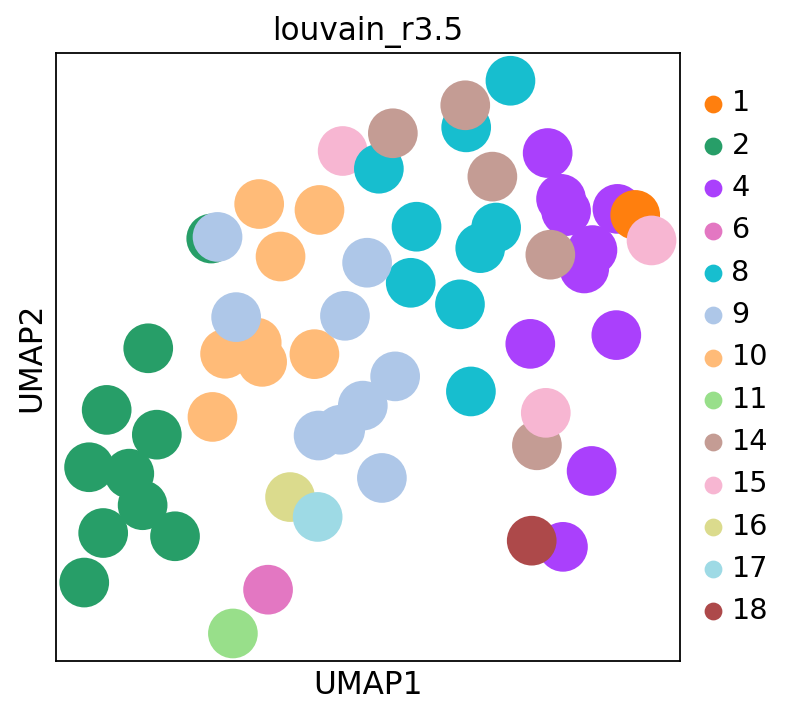

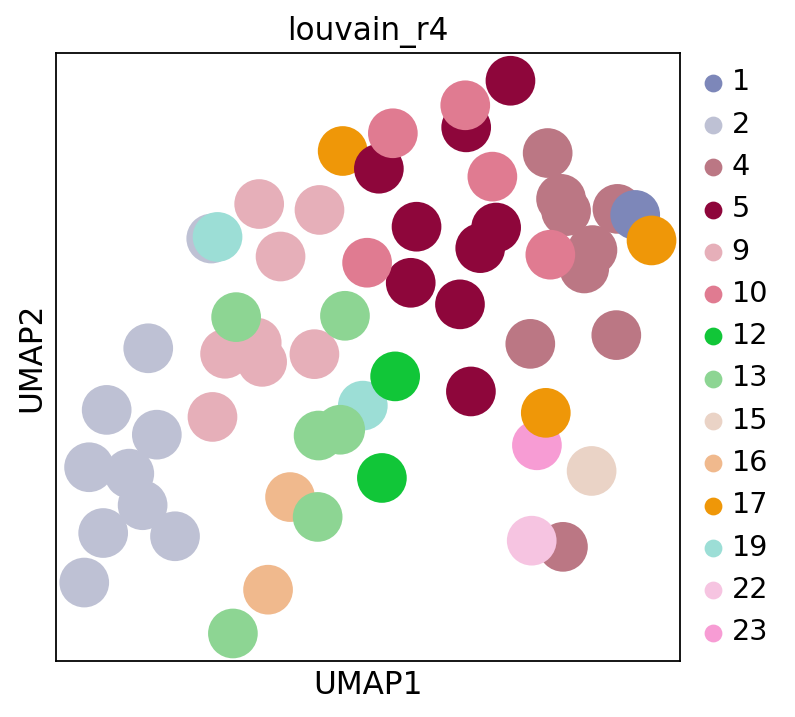

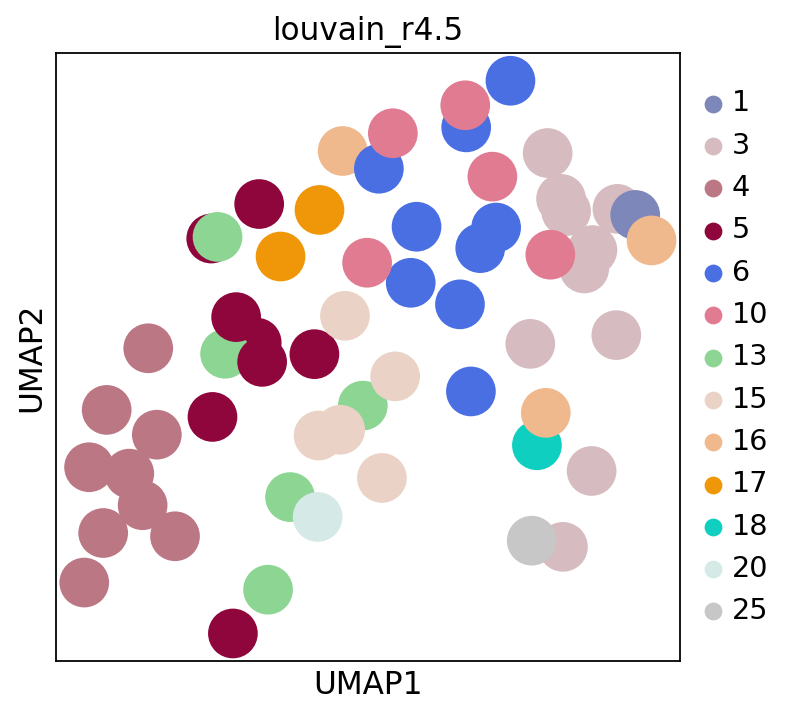

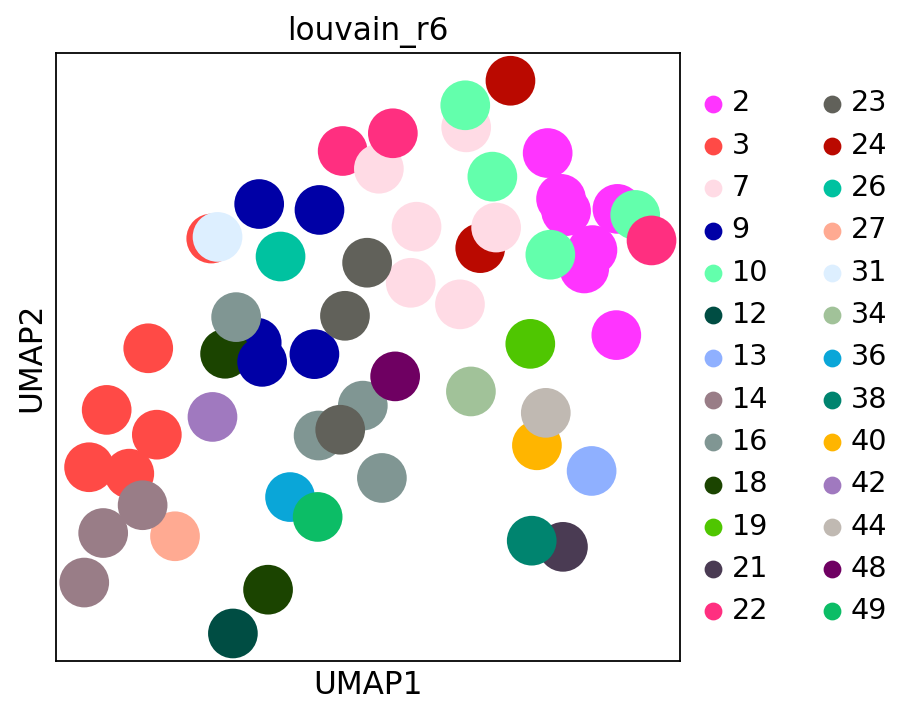

In [123]:
rcParams['figure.figsize']=(5,5)

#Visualize the clustering and how this is reflected by different technical covariates
for name in louvain_names:
    sc.pl.umap(adata, color=name, save = 'UMIs/louvain/'+name + '_NEFH_new_cluster0_cluster4.png')
#sc.pl.umap(adata, color=['log_counts','stimuli'])

computing PCA
    with n_comps=20
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing tSNE
    using 'X_pca' with n_pcs = 20
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


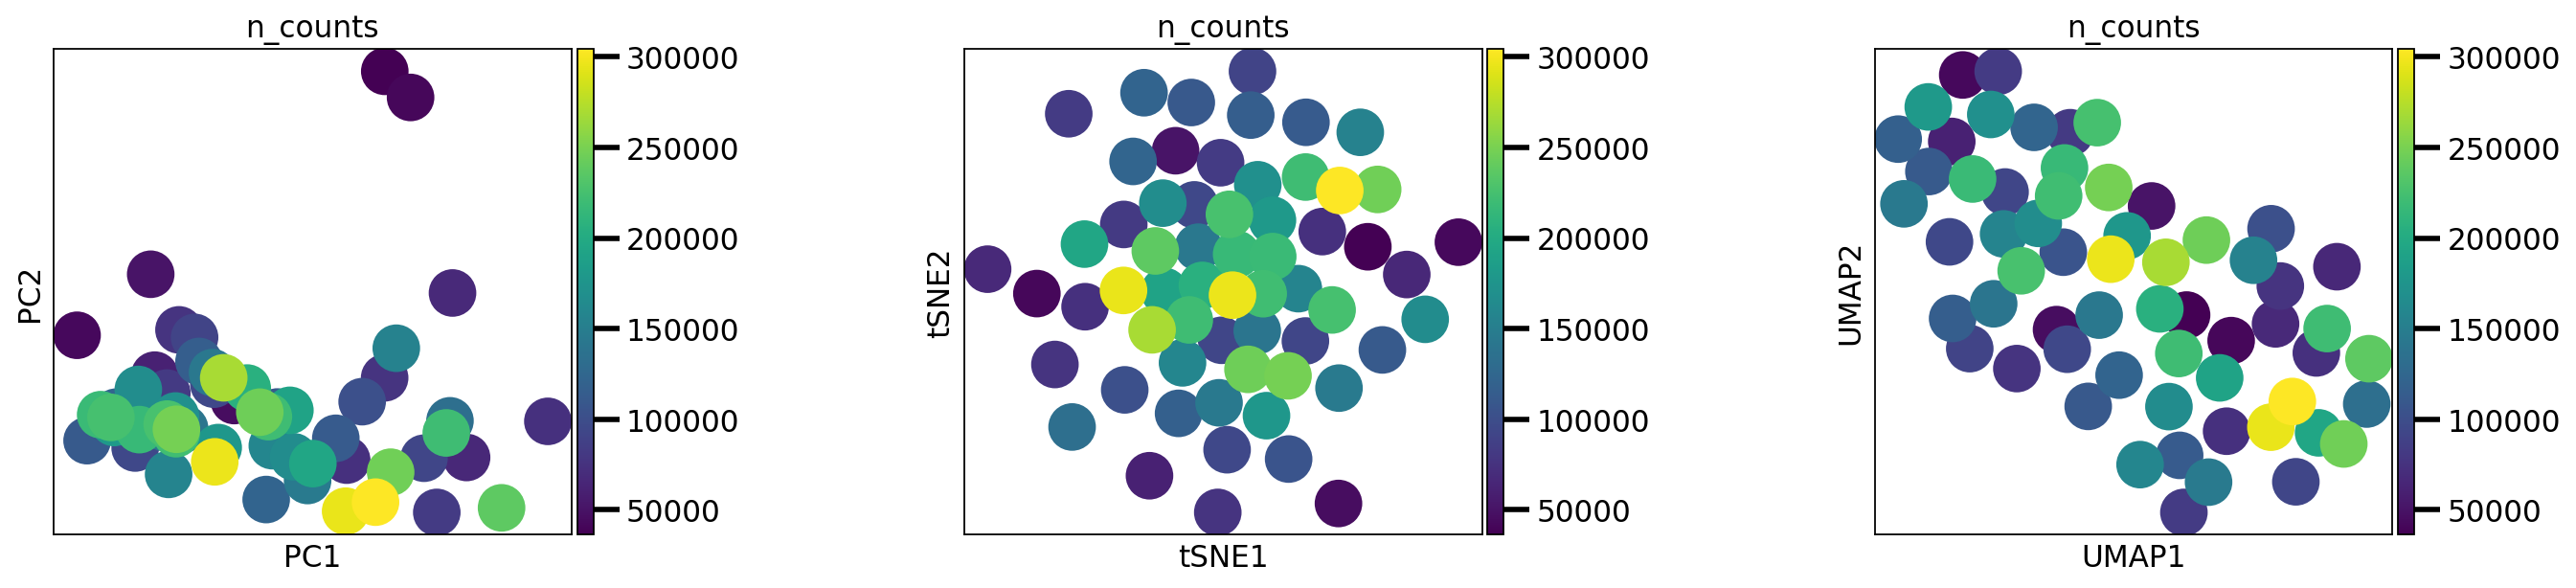

In [76]:
N_selected = 20
sc.pp.pca(adata, n_comps=N_selected, use_highly_variable=True, svd_solver='arpack')
#sc.pp.pca(adata, n_comps=N_selected, svd_solver='arpack')

#sc.pl.pca_variance_ratio(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)
sc.tl.umap(adata)

from matplotlib import rcParams

rcParams['figure.figsize']=(20,10)
fig_ind=np.arange(231, 237)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p10 = sc.pl.pca_scatter(adata, color='n_counts', ax=fig.add_subplot(fig_ind[0]), show=False)
p11 = sc.pl.tsne(adata, color='n_counts', ax=fig.add_subplot(fig_ind[1]), show=False)
p12 = sc.pl.umap(adata, color='n_counts', ax=fig.add_subplot(fig_ind[2]), show=False)
#p13 = sc.pl.diffmap(adata, color='n_counts', components=['1,2'], ax=fig.add_subplot(fig_ind[3]),show=False)
#p14 = sc.pl.diffmap(adata, color='n_counts', components=['1,3'], ax=fig.add_subplot(fig_ind[4]), show=False)
#p15 = sc.pl.draw_graph(adata, color='n_counts', ax=fig.add_subplot(fig_ind[5]), show=False)

plt.show()

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 2 clusters and added
    'louvain_r0.9', the cluster labels (adata.obs, categorical) (0:00:00)


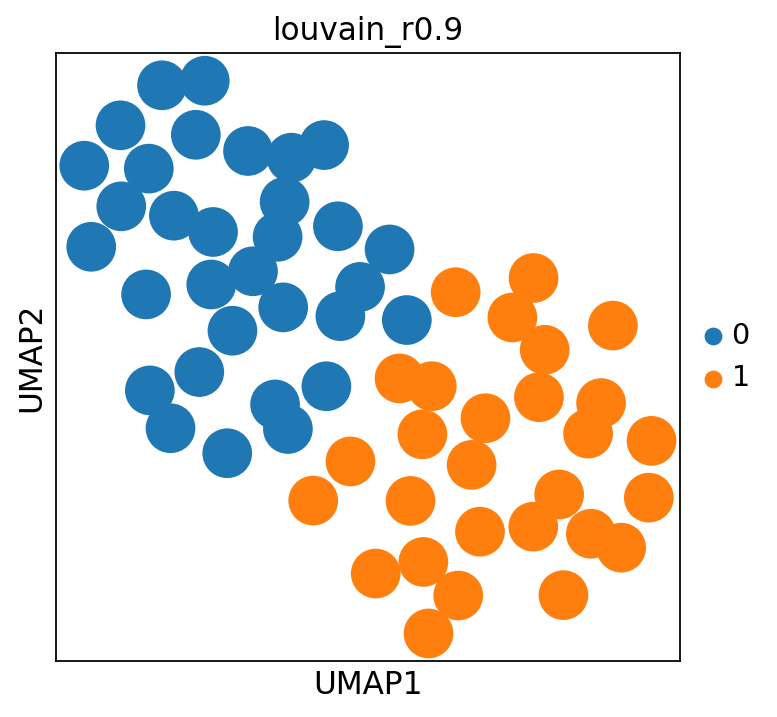

In [81]:
# Perform clustering - using highly variable genes ### maybe change to Leiden
louvain_paramenters = [0.9]
louvain_names = []
for value in louvain_paramenters:
    louvain_names.append('louvain_r' + str(value))

for value,name in zip(louvain_paramenters,louvain_names):
    sc.tl.louvain(adata, resolution=value, key_added=name)
rcParams['figure.figsize']=(5,5)

#Visualize the clustering and how this is reflected by different technical covariates
for name in louvain_names:
    sc.pl.umap(adata, color=name, save = 'UMIs/louvain/'+name + '_NEFH_new.png')
#sc.pl.umap(adata, color=['log_counts','stimuli'])

In [84]:
sc.tl.rank_genes_groups(adata, 'louvain_r0.9', method='wilcoxon')
rank_genes_df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/melma31/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/melma31/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


In [85]:
rank_genes_df

0        1
0    Cox6b1    Scn9a
1    Ndufs7    Gcnt2
2   Ndufa11   Cyfip2
3   Micos13   Dpysl2
4     Atp5j    Kalrn
5     Prdx5     Nav1
6      Pin1   Osbpl3
7    Atp5g1    Gnao1
8   Ndufab1     Syt4
9    Uqcrc1   Zbtb20
10   Eef1e1     Ank2
11  Lamtor4    Rbms3
12   Atp5pb   Ppp3ca
13   Timm8b     Ttc3
14     Dpcd   Lonrf1
15    Uqcc3   Lrrc8b
16     Ttc1  Tmem30a
17     Nudc     Scd2
18    Atp5e   Prrc2b
19  Selenom   Dhcr24